# Figure Mutation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import pearsonr, spearmanr

In [3]:
import utils_plot
import utils_config
import met_brewer

## Settings

In [4]:
TEXT_WIDTH = 6.7261  # in
DPI = 360

In [5]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [6]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(20)

## Settings

In [7]:
mapper_methods = {
    'imrex': 'ImRex', 
    'titan': 'TITAN', 
    'tcellmatch': 'TCellMatch',
    'stapler': 'STAPLER', 
    'ergo-ii': 'ERGO-II', 
    'pmtnet': 'pMTnet',
    'epitcr': 'epiTCR', 
    'atm-tcr': 'ATM-TCR', 
    'attntap': 'AttnTAP', 
    'teim': 'TEIM', 
    'bertrand': 'BERTrand', 
    'ergo-i': 'ERGO',
    'teinet': 'TEINet', 
    'panpep': 'PanPep', 
    'dlptcr': 'DLpTCR', 
    'tulip-tcr': 'TULIP-TCR', 
    'itcep': 'iTCep', 
    'nettcr': 'NetTCR-2.2',
}

## Load Data
### Performance

In [8]:
path_mutation = '../results/results_mutation_all_models_and_options.csv'
df_performance_all = pd.read_csv(path_mutation, index_col=0)
df_performance_all['Metric'] = df_performance_all['Metric'].replace('AverageRank', 'Rank')
df_performance_all['OldName'] = df_performance_all['Method']
df_performance_all['BaseModel'] = df_performance_all['Method'].str.split('_').str[0]
df_performance_all['Variant'] = df_performance_all['Method'].str.split('_').str[1:].str.join('_')
df_performance_all.head(5)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,bertrand,Tumor,full_data,804,Classification,AUC,0.423669,bertrand,bertrand,
1,bertrand,Tumor,full_data,804,Classification,APS,0.300210,bertrand,bertrand,
2,bertrand,Tumor,R28,134,Classification,AUC,0.690265,bertrand,bertrand,
3,bertrand,Tumor,R28,134,Classification,APS,0.268092,bertrand,bertrand,
4,bertrand,Tumor,R23,134,Classification,AUC,0.606171,bertrand,bertrand,


## Best models
We use the best models from the viral test

In [9]:
best_models = ['tulip-tcr',
 'nettcr_t.1.v.0',
 'teinet_SMALL_DS',
 'stapler',
 'ergo-ii_VDJDB',
 'titan',
 'ergo-i_AE_VDJDB',
 'atm-tcr',
 'imrex_FULL',
 'teim',
 'itcep',
 'bertrand',
 'dlptcr_BETA',
 'pmtnet',
 'tcellmatch_LINEAR_CV1',
 'epitcr_WITH_MHC',
 'attntap_VDJDB',
 'panpep'
]

In [10]:
df_performance_best = df_performance_all[df_performance_all['OldName'].isin(best_models)].copy()
df_performance_best.head()

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,bertrand,Tumor,full_data,804,Classification,AUC,0.423669,bertrand,bertrand,
1,bertrand,Tumor,full_data,804,Classification,APS,0.300210,bertrand,bertrand,
2,bertrand,Tumor,R28,134,Classification,AUC,0.690265,bertrand,bertrand,
3,bertrand,Tumor,R28,134,Classification,APS,0.268092,bertrand,bertrand,
4,bertrand,Tumor,R23,134,Classification,AUC,0.606171,bertrand,bertrand,


In [11]:
df_performance_best[(df_performance_best['Group']=='WeightedAverage') 
               &(df_performance_best['Metric']=='AUC')].sort_values('Value', ascending=False)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
225,itcep,All,WeightedAverage,26,Classification,AUC,0.615364,itcep,itcep,
225,tulip-tcr,All,WeightedAverage,26,Classification,AUC,0.598347,tulip-tcr,tulip-tcr,
225,titan,All,WeightedAverage,26,Classification,AUC,0.569896,titan,titan,
225,teim,All,WeightedAverage,26,Classification,AUC,0.559535,teim,teim,
225,imrex_FULL,All,WeightedAverage,26,Classification,AUC,0.557511,imrex_FULL,imrex,FULL
225,atm-tcr,All,WeightedAverage,26,Classification,AUC,0.533867,atm-tcr,atm-tcr,
225,tcellmatch_LINEAR_CV1,All,WeightedAverage,26,Classification,AUC,0.527253,tcellmatch_LINEAR_CV1,tcellmatch,LINEAR_CV1
225,nettcr_t.1.v.0,All,WeightedAverage,26,Classification,AUC,0.523210,nettcr_t.1.v.0,nettcr,t.1.v.0
225,dlptcr_BETA,All,WeightedAverage,26,Classification,AUC,0.511701,dlptcr_BETA,dlptcr,BETA
225,ergo-ii_VDJDB,All,WeightedAverage,26,Classification,AUC,0.503507,ergo-ii_VDJDB,ergo-ii,VDJDB


In [12]:
df_performance_best[(df_performance_best['Group']=='WeightedAverage') 
               &(df_performance_best['Metric']=='Spearman')].sort_values('Value', ascending=False)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
239,itcep,All,WeightedAverage,26,Regression,Spearman,0.213428,itcep,itcep,
239,tulip-tcr,All,WeightedAverage,26,Regression,Spearman,0.134959,tulip-tcr,tulip-tcr,
239,titan,All,WeightedAverage,26,Regression,Spearman,0.098020,titan,titan,
239,imrex_FULL,All,WeightedAverage,26,Regression,Spearman,0.082524,imrex_FULL,imrex,FULL
239,teim,All,WeightedAverage,26,Regression,Spearman,0.051156,teim,teim,
239,tcellmatch_LINEAR_CV1,All,WeightedAverage,26,Regression,Spearman,0.046962,tcellmatch_LINEAR_CV1,tcellmatch,LINEAR_CV1
239,atm-tcr,All,WeightedAverage,26,Regression,Spearman,0.039887,atm-tcr,atm-tcr,
239,epitcr_WITH_MHC,All,WeightedAverage,26,Regression,Spearman,0.023352,epitcr_WITH_MHC,epitcr,WITH_MHC
239,dlptcr_BETA,All,WeightedAverage,26,Regression,Spearman,0.003636,dlptcr_BETA,dlptcr,BETA
239,panpep,All,WeightedAverage,26,Regression,Spearman,-0.000156,panpep,panpep,


### Prediction Scores

In [13]:
model_names_score = sorted(df_performance_best['Method'].unique())

prediction_scores = pd.read_csv(f'../tcr_benchmark/results/predictions_{model_names_score[0]}_mutation.csv', index_col=0)
prediction_scores = prediction_scores.drop(columns=['Score'])
for tag in model_names_score:
    df_tmp = pd.read_csv(f'../tcr_benchmark/results/predictions_{tag}_mutation.csv', index_col=0)
    prediction_scores[tag] = df_tmp['Score'].values
prediction_scores.head()

,Epitope,TCR,Activation Score,Label,MHC,CDR3_alpha,CDR3_beta,V_alpha,J_alpha,V_beta,...,itcep,nettcr_t.1.v.0,panpep,pmtnet,stapler,tcellmatch_LINEAR_CV1,teim,teinet_SMALL_DS,titan,tulip-tcr
0,VPSVWRSSL,R21,76.687898,1,HLA-B*07:02,CALGTYGNNRLAF,CASTKGGPSSYEQYF,TRAV19*01,TRAJ7*01,TRBV6-6*02,...,0.0238,0.083848,0.379385,0.773,0.003859,0.027840,0.044316,0.050420,0.850787,-52.935249
1,RPSVWRSSL,R21,40.891720,0,HLA-B*07:02,CALGTYGNNRLAF,CASTKGGPSSYEQYF,TRAV19*01,TRAJ7*01,TRBV6-6*02,...,0.0164,0.086489,0.529586,0.784,0.004858,0.014126,0.034189,0.150774,0.354833,-61.117016
2,APSVWRSSL,R21,1.522293,0,HLA-B*07:02,CALGTYGNNRLAF,CASTKGGPSSYEQYF,TRAV19*01,TRAJ7*01,TRBV6-6*02,...,0.0158,0.088302,0.555675,0.768,0.005278,0.057064,0.038030,0.100737,0.837021,-49.621391
3,SPSVWRSSL,R21,4.955414,0,HLA-B*07:02,CALGTYGNNRLAF,CASTKGGPSSYEQYF,TRAV19*01,TRAJ7*01,TRBV6-6*02,...,0.0243,0.088975,0.508660,0.811,0.005857,0.014091,0.034717,0.064765,0.698753,-49.173737
4,KPSVWRSSL,R21,1.248408,0,HLA-B*07:02,CALGTYGNNRLAF,CASTKGGPSSYEQYF,TRAV19*01,TRAJ7*01,TRBV6-6*02,...,0.0235,0.085979,0.390077,0.763,0.004716,0.032109,0.035364,0.066939,0.716005,-51.572567


In [14]:
prediction_scores.to_csv('../supplement/S4_prediction_scores_mutation_dataset.csv')

### Alternatives

In [15]:
mapper_alt_names = {
    'LSTM_CV0': 'LSTM 0', 
    'LSTM_CV1': 'LSTM 1', 
    'LSTM_CV2': 'LSTM 2', 
    'GRU_CV0': 'GRU 0', 
    'GRU_CV1': 'GRU 1',
    'GRU_CV2': 'GRU 2', 
    'GRU_SEP_CV0': 'GRU-sep 0', 
    'GRU_SEP_CV1': 'GRU-sep 1', 
    'GRU_SEP_CV2': 'GRU-sep 2',
    'LSTM_SEP_CV0': 'LSTM-sep 0', 
    'LSTM_SEP_CV1': 'LSTM-sep 1', 
    'LSTM_SEP_CV2': 'LSTM-sep 2', 
    'LINEAR_CV0': 'Linear 0',
    'LINEAR_CV1': 'Linear 1', 
    'LINEAR_CV2': 'Linear 2', 
    'AE_VDJDB': 'AE VDJdb', 
    'LSTM_VDJDB': 'LSTM VDJdb', 
    'AE_MCPAS': 'AE McPas',
    'LSTM_MCPAS': 'LSTM McPas', 
    'VDJDB': 'VDJdb', 
    'MCPAS': 'McPas', 
    'DOWNSAMPLED': 'Small DS', 
    'FULL': 'Large DS', 
    'LARGE_DS': 'Large DS',
    'SMALL_DS': 'Small DS', 
    'WITH_MHC': 'with MHC', 
    'WO_MHC': 'wo MHC', 
    'ALPHA_BETA': 'Both chains', 
    'ALPHA': 'Alpha', 
    'BETA': 'Beta',
    't.0.v.1': 'T0.V1', 
    't.0.v.2': 'T0.V2', 
    't.0.v.3': 'T0.V3',
    't.0.v.4': 'T0.V4', 
    't.1.v.0': 'T1.V1', 
    't.1.v.2': 'T1.V2',
    't.1.v.3': 'T1.V3', 
    't.1.v.4': 'T1.V4', 
    't.2.v.0': 'T2.V1',
    't.2.v.1': 'T2.V2', 
    't.2.v.3': 'T2.V3', 
    't.2.v.4': 'T2.V4',
    't.3.v.0': 'T3.V0', 
    't.3.v.1': 'T3.V1', 
    't.3.v.2': 'T3.V2',
    't.3.v.4': 'T3.V4', 
    't.4.v.0': 'T4.V0', 
    't.4.v.1': 'T4.V1',
    't.4.v.2': 'T4.V2', 
    't.4.v.3': 'T4.V3'
}

In [16]:
df_performance_alt = df_performance_all[df_performance_all['Variant']!=''].copy()
df_performance_alt['Metric'] = df_performance_alt['Metric'].replace('AverageRank', 'Rank')
df_performance_alt['Variant'] = df_performance_alt['Variant'].map(mapper_alt_names)
df_performance_alt['Method'] = df_performance_alt['BaseModel'] + ' ' + df_performance_alt['Variant']
df_performance_alt.head(5)

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,tcellmatch LSTM 0,Tumor,full_data,804,Classification,AUC,0.663584,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
1,tcellmatch LSTM 0,Tumor,full_data,804,Classification,APS,0.513933,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
2,tcellmatch LSTM 0,Tumor,R28,134,Classification,AUC,0.442899,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
3,tcellmatch LSTM 0,Tumor,R28,134,Classification,APS,0.136355,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0
4,tcellmatch LSTM 0,Tumor,R23,134,Classification,AUC,0.825771,tcellmatch_LSTM_CV0,tcellmatch,LSTM 0


### Repertoires

In [17]:
def read_human_data():
    path_in = '../data/Affinity_prediction_rnf43_repertoire.xlsx'
    sheet = 'Normalized by PC'
    df = pd.read_excel(path_in, sheet, engine='openpyxl')
    df['Mutated_position'] = df['Mutated_position'].replace({'VPSVWRSSL': 0})
    df = df[[el for el in df.columns if not el.startswith('Unnamed')]]
    
    df.index = df['Mutated_position'].astype(str) + '_' + df['Mutated AA'].astype(str)
    df = df.drop(columns=['Peptide', 'Mutated_position', 'Peptide ID', 'Mutated AA'])
    df = df.drop(['R27'], axis=1)
    df = df.reindex(df.index[1:].tolist() + df.index[:1].tolist())
    return df
data_tumor = read_human_data()

In [18]:
def read_cmv_data():
    path_in = '../data/Affinity_prediction_cmv.xlsx'
    sheet = 'Mean'
    df = pd.read_excel(path_in, sheet, engine='openpyxl')
    
    df_pep = pd.read_excel(path_in, 'peptides', engine='openpyxl')
    df['Mutated_position'] = df_pep['Mutated Position']
    df['Mutated AA'] = df_pep['Amino acid']
    
    df['Mutated AA'] = df['Mutated AA'].replace({'original': 0})
    df = df[[el for el in df.columns if not el.startswith('Unnamed')]]
    
    df.index = df['Mutated_position'].astype(str) + '_' + df['Mutated AA'].astype(str)
    df = df.drop(columns=['Mutated_position', 'Mutated AA', 'Peptide_ID'])
    #tcrs = df.columns[4:11]
    #df = df[tcrs]
    df = df.reindex(df.index[1:].tolist() + df.index[:1].tolist())
    sorted_columns = df.loc['0_0'].sort_values(ascending=False)
    df = df[sorted_columns.index]
    return df
data_cmv = read_cmv_data()

In [19]:
vmin = min(data_cmv.values.min(), data_tumor.values.min())
vmax = min(data_cmv.values.max(), data_tumor.values.max())

## Poster

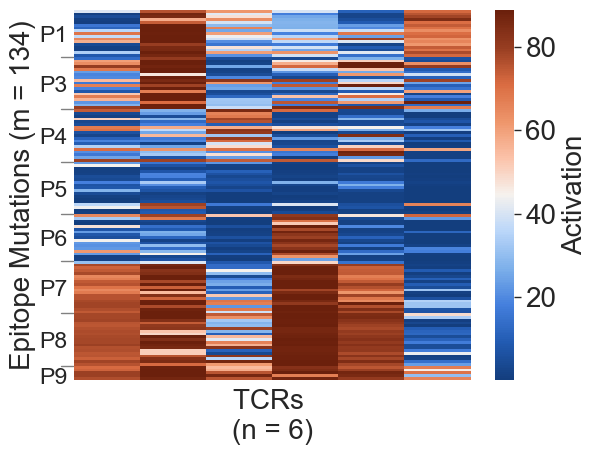

In [20]:
def plot_data_heatmap(data, tag='', ax=None, do_legend=True):
    plot = sb.heatmap(data=data, ax=ax, vmin=vmin, vmax=vmax, yticklabels=data.index, square=False,
                     cmap=list(reversed(met_brewer.met_brew(name='OKeeffe1', n=200, brew_type='continuous'))))
    plot.set_xticklabels([])    
    apl_colors = np.array([int(apl.split('_')[0]) for apl in data.index]).reshape((1, -1))
    apl_labels = [''] * len(data.index)
    idx_start = 0
    
    
    bbox = plot.get_position()
    width = bbox.width / (0.25 if tag=='CMV ' else 0.2)
    
    for i in list(set(apl_colors.tolist()[0])):
        n_elements = np.sum(apl_colors==i)
        if i not in [0, 9]:
            plot.axhline(y=idx_start + n_elements - 1, color='gray', linewidth=1, 
                         xmin=-0.1/width, xmax=-0.01/width, clip_on=False)
        apl_labels[idx_start + max(n_elements//2, 3)] = f'P{i}' if i != 0 else ''
        idx_start += n_elements
        
    plot.set_yticklabels(apl_labels, rotation=0, size='small')
    
    plot.set_ylabel(f'Epitope Mutations (m = {data.shape[0]})', labelpad=2)
    #plot.xaxis.set_label_position('top')
    plot.set_xlabel(f'{tag}TCRs \n(n = {data.shape[1]})', labelpad=2)
    
    plot.collections[0].colorbar.set_label('Activation', rotation=90)
    
    plot.tick_params(axis='both', pad=0)
    if not do_legend:
        plot.collections[0].colorbar.remove()

plot_data_heatmap(data_tumor)

['teim' 'imrex' 'titan' 'tulip-tcr' 'itcep']


,Value,WT_activation,%_Activated,Dataset
CMV_10_4,0.611967,68.771930,0.290698,CMV
CMV_11_4,0.598567,67.148760,0.354651,CMV
CMV_1_4,0.579448,48.340040,0.087209,CMV
CMV_2_4,0.599672,45.838668,0.226744,CMV
CMV_3_4,0.684133,53.753754,0.063953,CMV
CMV_4_4,0.707190,46.105919,0.122093,CMV
CMV_51_10,0.661161,41.658137,0.023256,CMV
CMV_52_10,0.501875,50.404449,0.186047,CMV
CMV_54_10,0.629419,52.469136,0.168605,CMV
CMV_5_2,0.598607,70.643154,0.494186,CMV


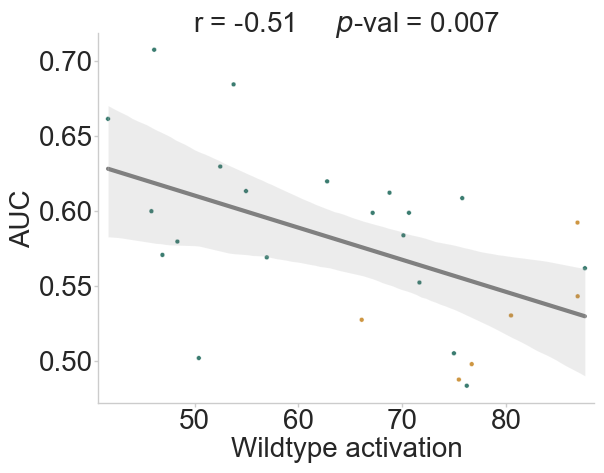

In [21]:
color_dataset = met_brewer.met_brew(name='Kandinsky', n=2, brew_type='disrete')
def plot_wt_vs_performance(df, metric, n_top=5, ax=None):
    df_tmp = df[df['Metric']==metric]
    if n_top:
        best_models = df_tmp[df_tmp['Group']=='Average'].sort_values('Value')['BaseModel'][-n_top:].values
        print(best_models)
        df_tmp = df_tmp[df_tmp['BaseModel'].isin(best_models)]
    
    df_tmp = df_tmp[~df_tmp['Group'].isin(['Average', 'WeightedAverage', 'full_data'])]
    df_tmp = df_tmp.groupby('Group')['Value'].mean()
    df_tmp = pd.DataFrame(df_tmp)
    df_tmp.index.name = None
    
    wt_tumor = pd.concat([pd.DataFrame(data_tumor.loc['0_0']), pd.DataFrame((data_tumor>66.09).mean())], axis=1)
    wt_tumor['Dataset'] = 'Tumor'
    wt_cmv = pd.concat([pd.DataFrame(data_cmv.loc['0_0']), pd.DataFrame((data_cmv>40.0).mean())], axis=1)
    wt_cmv.index = 'CMV_' + wt_cmv.index
    wt_cmv['Dataset'] = 'CMV'
    df_wt = pd.concat([wt_tumor, wt_cmv])
    df_wt.columns = ['WT_activation', '%_Activated', 'Dataset', ]
    df_tmp = pd.concat([df_tmp, df_wt], axis=1)
    
    
    plot = sb.scatterplot(data=df_tmp, x='WT_activation', y='Value',
                          hue='Dataset', palette=color_dataset,
                         size=1, color='seagreen', ax=ax)
    df_tmp = df_tmp.copy()
    plot = sb.regplot(data=df_tmp, x='WT_activation', y='Value',
                      color='gray', ax=ax, scatter=False, line_kws={'zorder': -1, 
                                                                    'linewidth': utils_plot.LINEWIDTH})
    delta = df_tmp['WT_activation'].max() - df_tmp['WT_activation'].min()
    plot.set_xlim(df_tmp['WT_activation'].min()-0.02*delta, df_tmp['WT_activation'].max()+0.02*delta,)
    
    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel(metric, labelpad=2)
    plot.set_xlabel('Wildtype activation', labelpad=2)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()
    
    corr, p_val = pearsonr(df_tmp['WT_activation'].values, df_tmp['Value'].values)
    plot.set_title(f'r = {corr:.2f}     $p$-val = {p_val:.3f}', pad=1)
    return df_tmp
    
plot_wt_vs_performance(df_performance_best, 'AUC', 5)

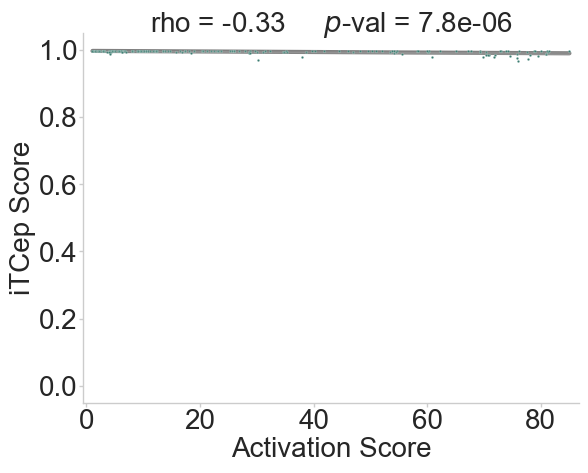

In [22]:
def plot_prediction_vs_activation(tcrs, method, ax=None):
    df_tmp = prediction_scores[prediction_scores['TCR'].isin(tcrs)][['Activation Score', 'Label', 'TCR', method]]
    plot = sb.scatterplot(data=df_tmp, x='Activation Score', y=method,
                          color=met_brewer.met_brew(name='Kandinsky', n=2, brew_type='disrete')[1 if tcrs[0].startswith('R') else 0],
                         s=3, ax=ax)
    df_tmp = df_tmp.copy()
    
    for tcr in tcrs:
        df_tcr = df_tmp[df_tmp['TCR']==tcr]
        plot = sb.regplot(data=df_tcr, x='Activation Score', y=method,
                          color='gray', ax=ax, scatter=False, line_kws={'zorder': -1, 
                                                                    'linewidth': utils_plot.LINEWIDTH})
        corr, p_val = spearmanr(df_tcr['Activation Score'].values, df_tcr[method].values)
        out = f'rho = {corr:.2f}     $p$-val = {p_val:.1e}'
        if len(tcrs) == 1:
            plot.set_title(out, pad=1)
        else:
            print(f'{tcr}: ' + out)
    
    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel(f'{utils_config.mapper_methods[method]} Score', labelpad=2)
    plot.set_xlabel('Activation Score', labelpad=2)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    #plot.legend().remove()
    
    delta = df_tmp['Activation Score'].max() - df_tmp['Activation Score'].min()
    plot.set_xlim(df_tmp['Activation Score'].min()-0.02*delta, df_tmp['Activation Score'].max()+0.02*delta,)
    plot.set_ylim(-0.05, 1.05)
    
    #return df_tmp
    
plot_prediction_vs_activation(['CMV_81_14'], 'itcep') #'R25', 

In [23]:
df_performance_best[(df_performance_best['Method']=='itcep')
                   & (df_performance_best['Metric']=='Spearman')
                   & (~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage']))].sort_values('Value')

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
201,itcep,Cmv,CMV_81_14,172,Regression,Spearman,-0.333474,itcep,itcep,
177,itcep,Tumor,R26,134,Regression,Spearman,-0.227434,itcep,itcep,
179,itcep,Tumor,R21,134,Regression,Spearman,-0.108161,itcep,itcep,
211,itcep,Cmv,CMV_1_4,172,Regression,Spearman,0.040749,itcep,itcep,
221,itcep,Cmv,CMV_73_14,172,Regression,Spearman,0.051145,itcep,itcep,
223,itcep,Cmv,CMV_52_10,172,Regression,Spearman,0.053214,itcep,itcep,
171,itcep,Tumor,R28,134,Regression,Spearman,0.082738,itcep,itcep,
181,itcep,Tumor,R24,134,Regression,Spearman,0.083228,itcep,itcep,
173,itcep,Tumor,R23,134,Regression,Spearman,0.093755,itcep,itcep,
205,itcep,Cmv,CMV_74_14,172,Regression,Spearman,0.137676,itcep,itcep,


## Data Figure

D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Proje

['teim' 'imrex' 'titan' 'tulip-tcr' 'itcep']
['tcellmatch' 'imrex' 'titan' 'tulip-tcr' 'itcep']


C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1148625152.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


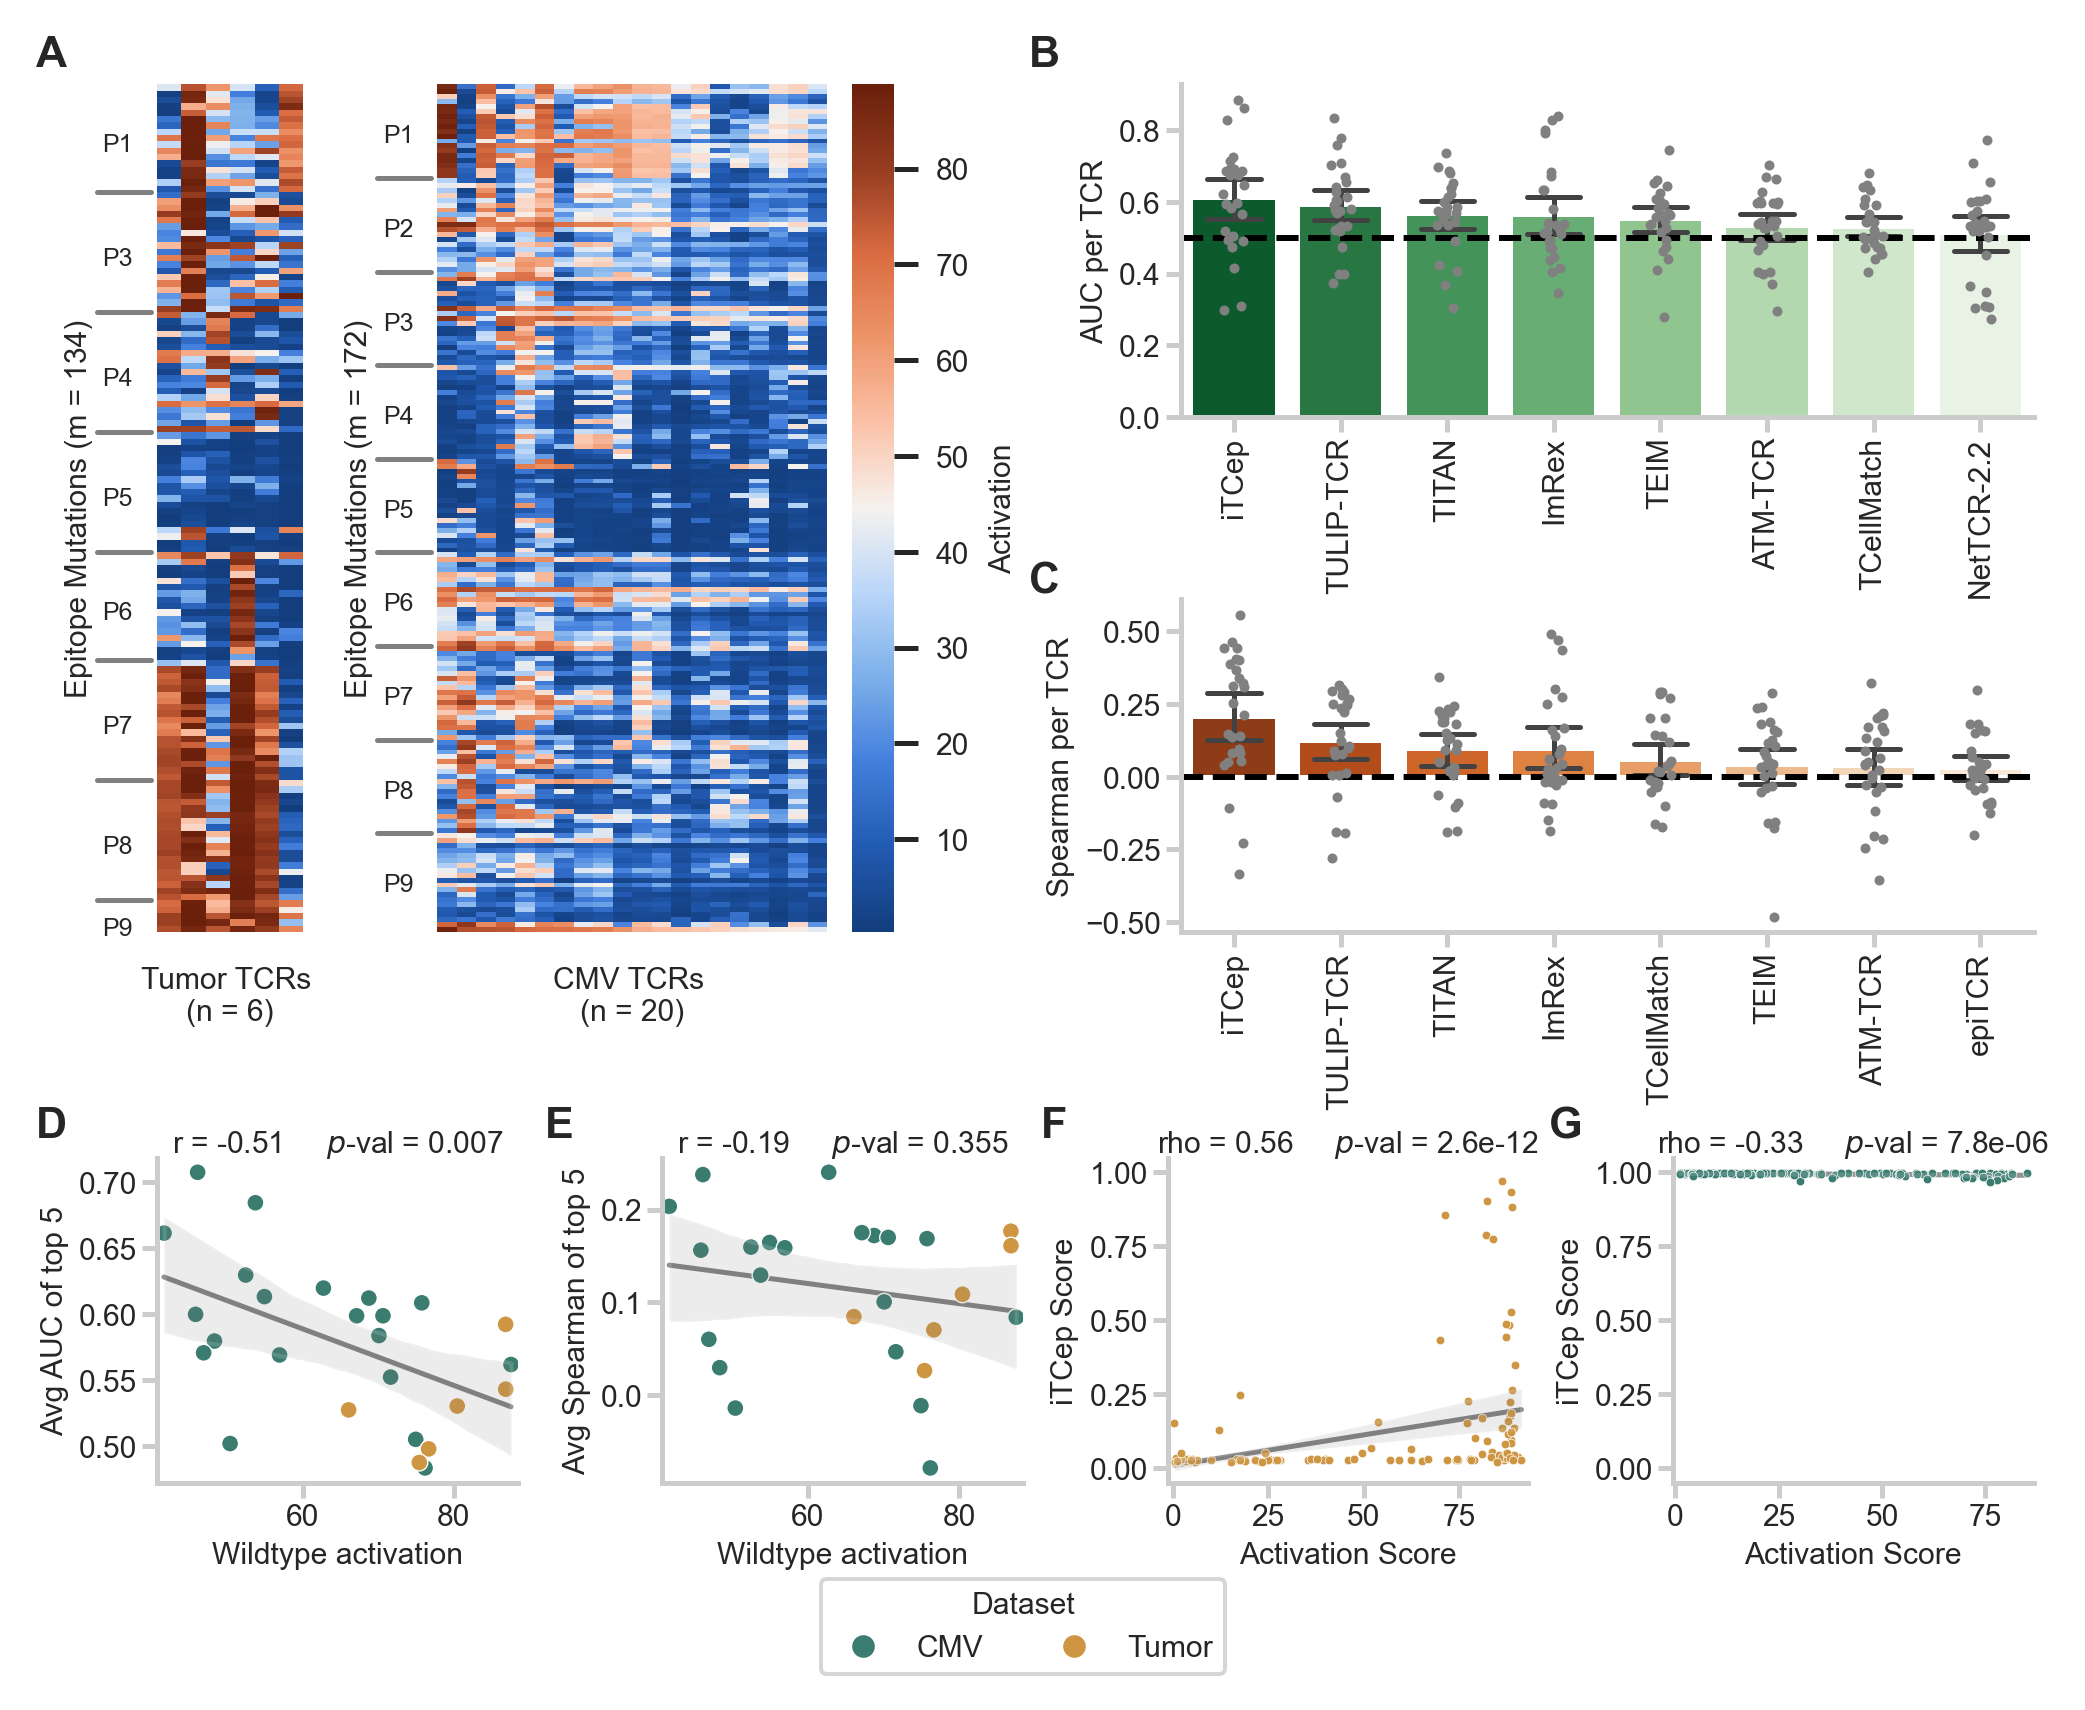

In [24]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.75),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[0.66, 0.33],
    width_ratios=[0.3, 1, 2],
    wspace=0.25
)

gridspecs["full1"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[0.66, 0.33],
    width_ratios=[0.3, 1, 2],
    wspace=0.5
)

gridspecs["full2"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=1,
    #ncols=3,
    height_ratios=[0.75, 0.25],
    #width_ratios=[0.3, 1, 3],
    hspace=0.15
)


gridspecs["cd"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs['full1'][2],
    nrows=2,
    ncols=1,
    height_ratios=[1, 1],
    width_ratios=[1],
    hspace=0.55,
    wspace=0.3,
)

gridspecs["ef"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs['full2'][1],
    nrows=1,
    ncols=4,
    height_ratios=[1],
    width_ratios=[1, 1, 1, 1],
    hspace=0.5,
    wspace=0.4,
)


ax_a = fig.add_subplot(gridspecs["full"][0])
ax_b = fig.add_subplot(gridspecs["full"][1])
ax_c = fig.add_subplot(gridspecs["cd"][0])
ax_d = fig.add_subplot(gridspecs["cd"][1])
ax_e = fig.add_subplot(gridspecs["ef"][0])
ax_f = fig.add_subplot(gridspecs["ef"][1])
ax_g = fig.add_subplot(gridspecs["ef"][2])
ax_h = fig.add_subplot(gridspecs["ef"][3])

plot_data_heatmap(data_tumor, 'Tumor ', ax_a, do_legend=False)
plot_data_heatmap(data_cmv, 'CMV ', ax_b, do_legend=True)

utils_plot.plot_barplot(df_performance_best, 'AUC', n_top=8, cmap='Greens_r', ax=ax_c, rdm=0.5)
ax_c.set_ylabel('AUC per TCR')

utils_plot.plot_barplot(df_performance_best, 'Spearman', n_top=8, cmap='Oranges_r', ax=ax_d, rdm=0.0)
ax_d.set_ylabel('Spearman per TCR')

plot_wt_vs_performance(df_performance_best, 'AUC', 5, ax=ax_e)
ax_e.set_ylabel('Avg AUC of top 5')

plot_wt_vs_performance(df_performance_best, 'Spearman', 5, ax=ax_f)
ax_f.set_ylabel('Avg Spearman of top 5')

handles, labels = ax_f.get_legend_handles_labels()
ax_f.legend(handles[:2], labels[:2], title='Dataset', ncols=2, loc='upper center', bbox_to_anchor=(1, -0.25))

plot_prediction_vs_activation(['R25'], 'itcep', ax=ax_g)
plot_prediction_vs_activation(['CMV_81_14'], 'itcep', ax=ax_h)

fig.text(0.075, 0.89, 'A', size='x-large', weight='bold')
fig.text(0.485, 0.89, 'B', size='x-large', weight='bold')
fig.text(0.485, 0.6, 'C', size='x-large', weight='bold')

fig.text(0.075, 0.3, 'D', size='x-large', weight='bold')
fig.text(0.285, 0.3, 'E', size='x-large', weight='bold')
fig.text(0.49, 0.3, 'F', size='x-large', weight='bold')
fig.text(0.7, 0.3, 'G', size='x-large', weight='bold')

fig.tight_layout()
fig.savefig('../figures/fig_mutation_benchmark.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/fig_mutation_benchmark.png',
           dpi=DPI, bbox_inches='tight')

In [25]:
df_performance_best[~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage'])]['Group'].nunique()

26

## All Models

D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Proje

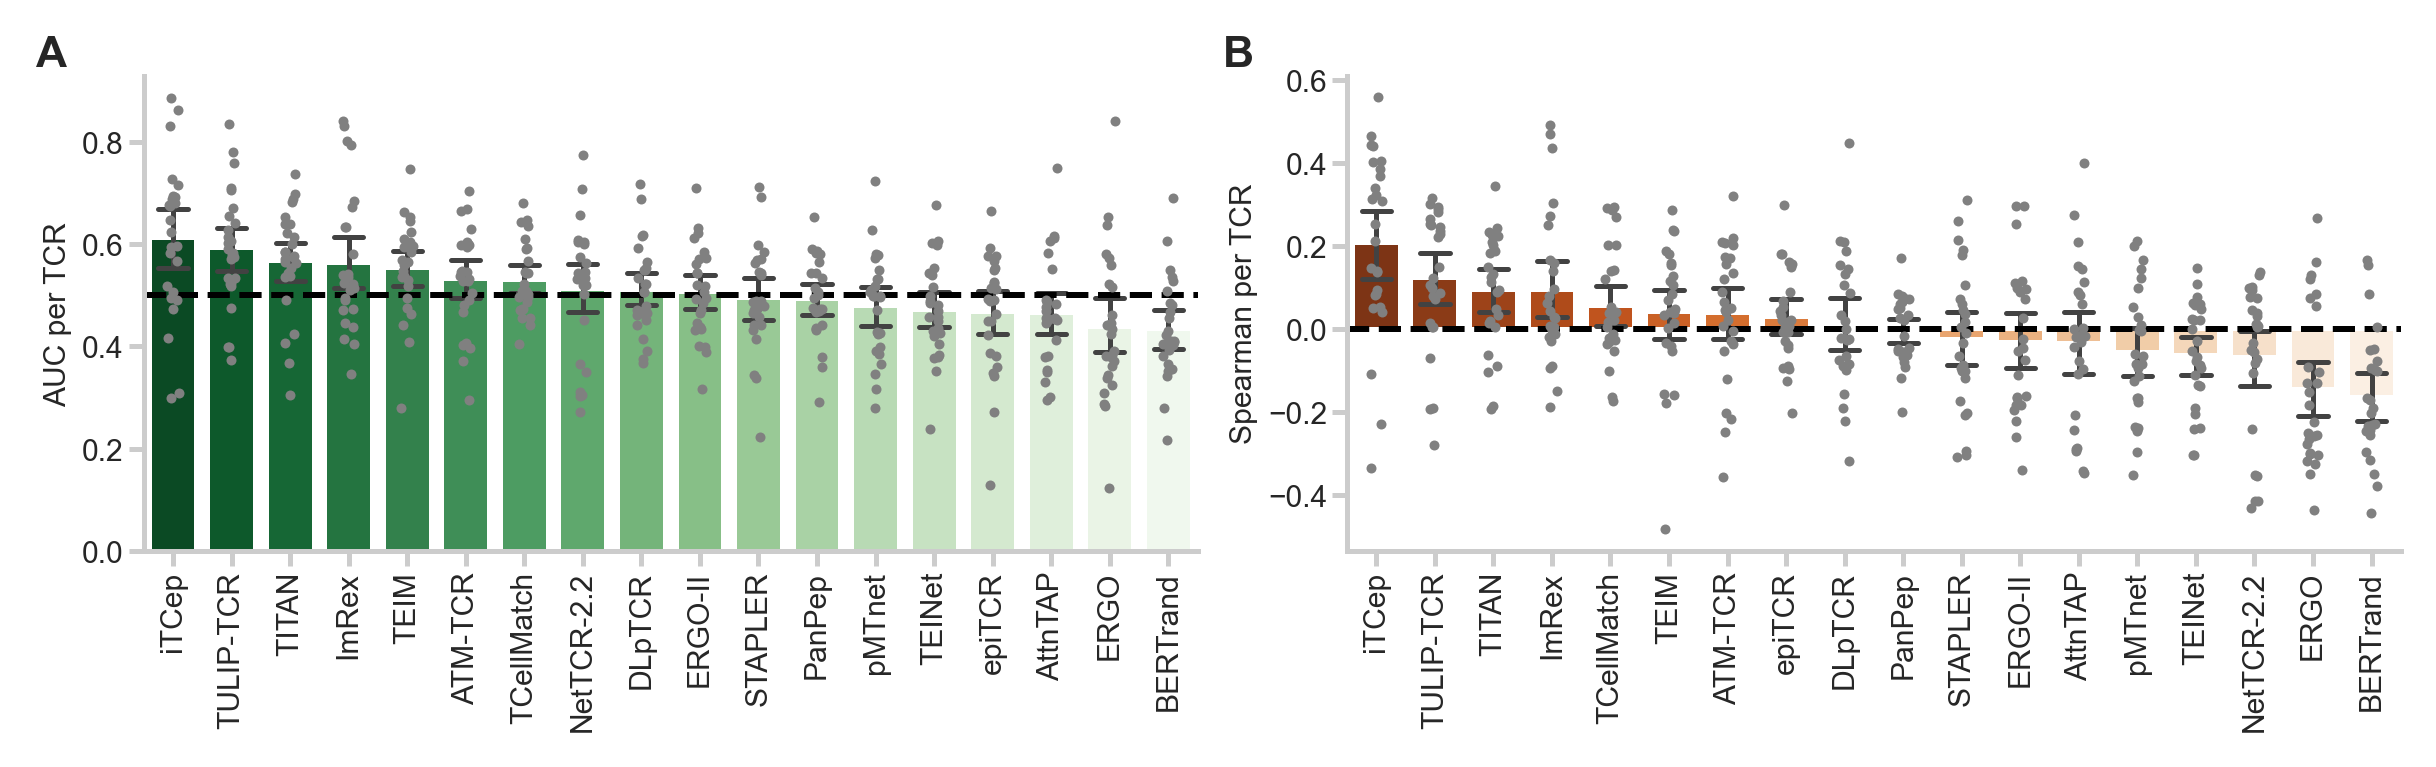

In [26]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.3),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=1,
    ncols=2,
    height_ratios=[1,],
    width_ratios=[1, 1],
)

ax_a = fig.add_subplot(gridspecs["full"][0])
ax_b = fig.add_subplot(gridspecs["full"][1])

utils_plot.plot_barplot(df_performance_best, 'AUC', n_top=18, cmap='Greens_r', ax=ax_a, rdm=0.5)
ax_a.set_ylabel('AUC per TCR')

utils_plot.plot_barplot(df_performance_best, 'Spearman', n_top=18, cmap='Oranges_r', ax=ax_b, rdm=0)
ax_b.set_ylabel('Spearman per TCR')

fig.text(0.01, 0.96, 'A', size='x-large', weight='bold')
fig.text(0.5, 0.96, 'B', size='x-large', weight='bold')

fig.tight_layout()
fig.savefig('../figures/sfig_mutation_benchmark_all.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/sfig_mutation_benchmark_all.png',
           dpi=DPI, bbox_inches='tight')

## Alternatives

In [27]:
base_methods = sorted(df_performance_alt['BaseModel'].unique(), key=lambda x: x.lower())
colors_models = {m: met_brewer.met_brew(name='Signac', n=9, brew_type='discrete')[i]  # sb.color_palette('pastel')[i] 
                 for i, m in enumerate(base_methods)}

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)


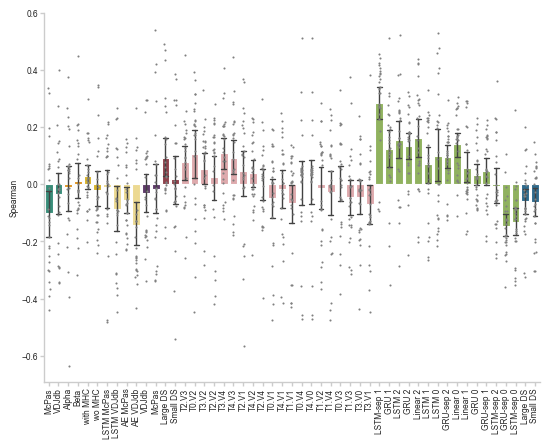

In [28]:
from matplotlib.patches import Patch
def plot_alternatives(df, metric, sort_by='Average', ax=None, rdm=None):
    df_plot = df[(df['Metric']==metric) & (~df['Group'].isin(['full_data', 'Average', 'WeightedAverage']))].copy()
    mean_perf = df_plot.groupby('Method')['Value'].mean().to_dict()
    df_plot['avgValue'] = df_plot['Method'].map(mean_perf)
    
    order = df[(df['Metric']=='AUC') & (df['Group']==sort_by)].sort_values(['BaseModel', 'Value'], ascending=[True, False],
                                                                           )['Method'].values
    
    order_base = df[(df['Metric']=='AUC') & (df['Group']==sort_by)].sort_values(['Method'])['BaseModel'].values
    palette = [colors_models[m] for m in order_base]
    df_plot = df_plot.reset_index(drop=True)
    
    plot = sb.barplot(data=df_plot, y='Value', x='Method',
                          order=order,
                          palette=palette,
                          errwidth=utils_plot.LINEWIDTH,
                          capsize=0.5,
                          ax=ax)
    plot = sb.stripplot(data=df_plot, y='Value', x='Method',
                          order=order,
                          color='gray',
                          size=1.5,
                          ax=ax)

    xlabels = plot.get_xticklabels()
    xlabels = [' '.join(el.get_text().split(' ')[1:]) for el in xlabels]
    plot.set_xticklabels(xlabels, rotation=90)

    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel(metric, labelpad=2)
    plot.set_xlabel(None)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)

    plot.spines['left'].set_linewidth(utils_plot.LINEWIDTH)
    plot.spines['bottom'].set_linewidth(utils_plot.LINEWIDTH)

    if rdm is not None:
        plot.axhline(y=rdm, color='gray', linestyle='--')

plot_alternatives(df_performance_alt, 'Spearman')

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\1037769809.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

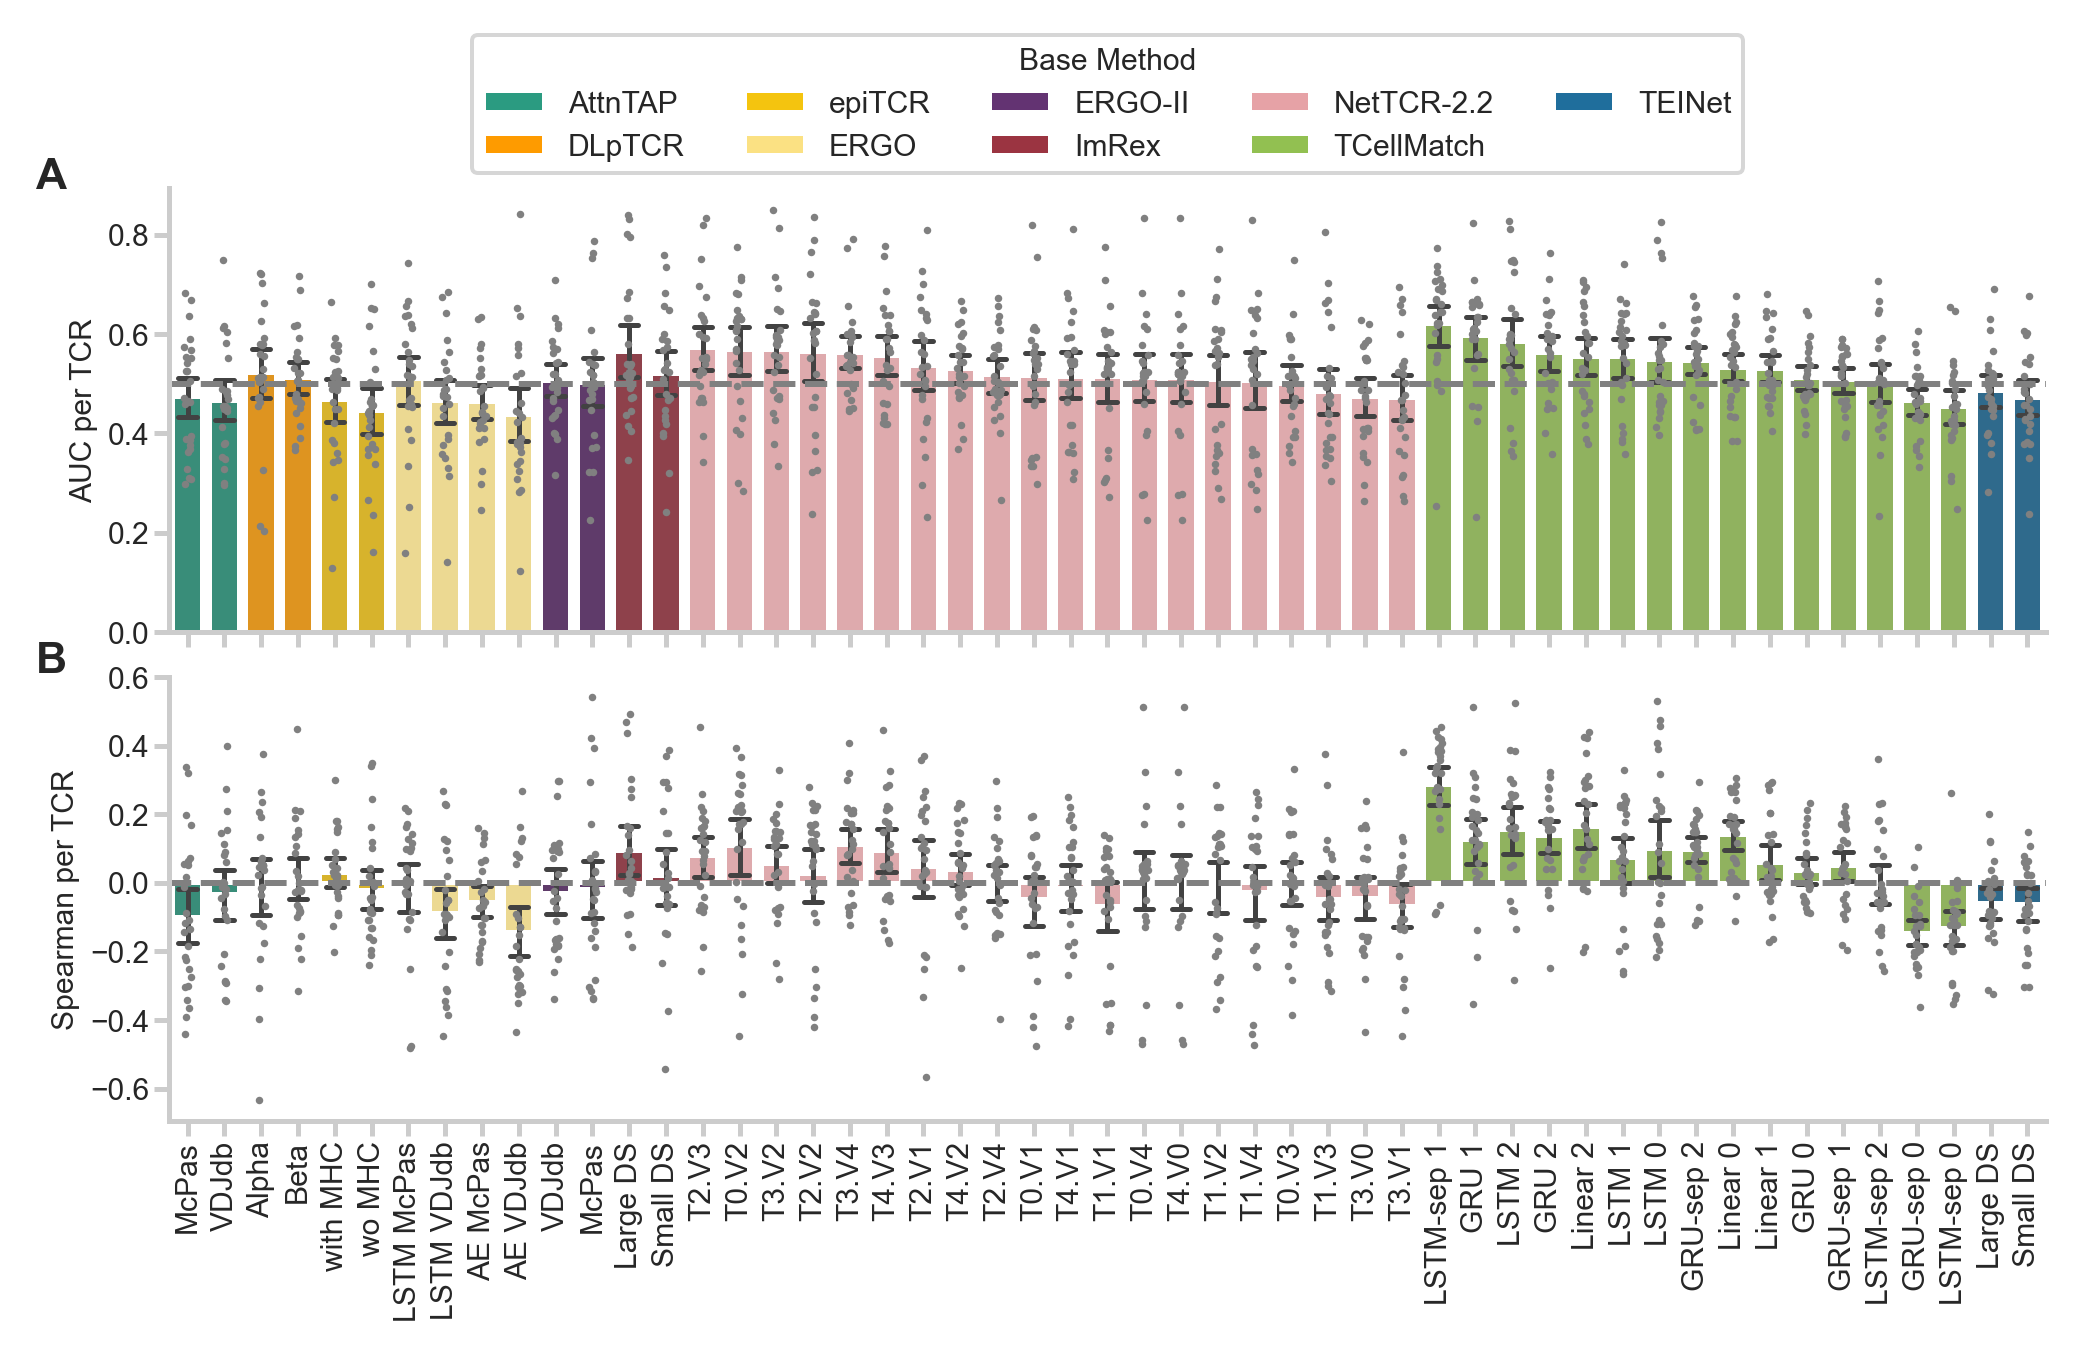

In [29]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.5),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=1,
    height_ratios=[1, 1],
    width_ratios=[1],
    hspace=0.1
)

for i, metric in enumerate(['AUC', 'Spearman']):    
    ax_ = fig.add_subplot(gridspecs["full"][i])
    plot_alternatives(df_performance_alt, metric, sort_by='Average', ax=ax_, rdm=0.5 if i==0 else 0)
    ax_.set_ylabel(f'{metric} per TCR')
    
    if i == 0:
        ax_.set_xticklabels([])
        custom_legend = [Patch(facecolor=c, label=utils_config.mapper_methods[l]) for l, c in colors_models.items()]
        ax_.legend(handles=custom_legend, title='Base Method', ncol=5, bbox_to_anchor=(0.5, 1), loc='lower center')

fig.text(0.07, 0.88, 'A', size='x-large', weight='bold')
fig.text(0.07, 0.48, 'B', size='x-large', weight='bold')

fig.tight_layout()
fig.savefig('../figures/sfig_mutation_alternatives.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/sfig_mutation_alternatives.png',
           dpi=DPI, bbox_inches='tight')

## Supplement: separate by dataset

In [30]:
def add_metric_avg(df, metric):
    df_tmp = df[df['Group'] != 'full_data']
    df_tmp = df_tmp[df_tmp['Metric'] == metric]
    df_tmp = df_tmp.groupby(['Method', 'Dataset', 'Support', 'Metric_Type', 'Metric', 'OldName', 'BaseModel', 'Variant'])['Value'].mean()
    df_tmp = pd.DataFrame(df_tmp).reset_index()
    df_tmp['Group'] = 'Average'
    df_tmp = pd.concat([df, df_tmp])
    return df_tmp

df_perf_tumor = df_performance_best[df_performance_best['Dataset']=='Tumor']
df_perf_cmv = df_performance_best[df_performance_best['Dataset']=='Cmv']

for m in df_performance_best['Metric'].unique():
    df_perf_tumor = add_metric_avg(df_perf_tumor, m)
    df_perf_cmv = add_metric_avg(df_perf_cmv, m)

In [31]:
df_perf_tumor

,Method,Dataset,Group,Support,Metric_Type,Metric,Value,OldName,BaseModel,Variant
0,bertrand,Tumor,full_data,804,Classification,AUC,0.423669,bertrand,bertrand,
1,bertrand,Tumor,full_data,804,Classification,APS,0.300210,bertrand,bertrand,
2,bertrand,Tumor,R28,134,Classification,AUC,0.690265,bertrand,bertrand,
3,bertrand,Tumor,R28,134,Classification,APS,0.268092,bertrand,bertrand,
4,bertrand,Tumor,R23,134,Classification,AUC,0.606171,bertrand,bertrand,
...,...,...,...,...,...,...,...,...,...,...
13,tcellmatch_LINEAR_CV1,Tumor,Average,134,Regression,Spearman,0.233188,tcellmatch_LINEAR_CV1,tcellmatch,LINEAR_CV1
14,teim,Tumor,Average,134,Regression,Spearman,-0.140966,teim,teim,
15,teinet_SMALL_DS,Tumor,Average,134,Regression,Spearman,-0.015447,teinet_SMALL_DS,teinet,SMALL_DS
16,titan,Tumor,Average,134,Regression,Spearman,0.014496,titan,titan,


r = 0.07     $p$-val = 0.790


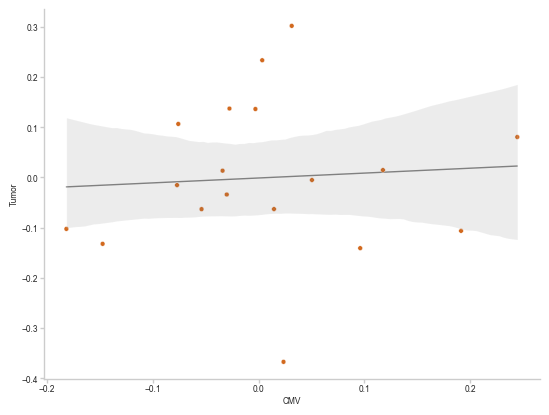

In [32]:
def plot_corr_subsets(metric, ax):
    df_tumor_tmp = df_perf_tumor[(df_perf_tumor['Metric']==metric) & (df_perf_tumor['Group']=='Average')]
    df_tumor_tmp = df_tumor_tmp[['BaseModel', 'Value']].set_index('BaseModel')
    df_tumor_tmp.columns = ['Tumor']
    
    df_cmv_tmp = df_perf_cmv[(df_perf_cmv['Metric']==metric) & (df_perf_cmv['Group']=='Average')]
    df_cmv_tmp = df_cmv_tmp[['BaseModel', 'Value']].set_index('BaseModel')
    df_cmv_tmp.columns = ['CMV']
    df_tmp = pd.concat([df_tumor_tmp, df_cmv_tmp], axis=1).reset_index()

    
    plot = sb.scatterplot(data=df_tmp, x='CMV', y='Tumor',
                          #hue='Dataset', #palette=color_dataset,
                         size=1, color='seagreen' if metric == 'AUC' else 'chocolate', 
                          ax=ax)
    
    plot = sb.regplot(data=df_tmp, x='CMV', y='Tumor',
                      color='gray', ax=ax, scatter=False, line_kws={'zorder': -1, 
                                                                    'linewidth': utils_plot.LINEWIDTH})
    #delta = df_tmp['WT_activation'].max() - df_tmp['WT_activation'].min()
    #plot.set_xlim(df_tmp['WT_activation'].min()-0.02*delta, df_tmp['WT_activation'].max()+0.02*delta,)
    
    sb.despine(ax=plot)
    plot.grid(False)
    plot.set_ylabel('Tumor', labelpad=2)
    plot.set_xlabel('CMV', labelpad=2)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()
    
    corr, p_val = pearsonr(df_tmp['CMV'].values, df_tmp['Tumor'].values)
    print(f'r = {corr:.2f}     $p$-val = {p_val:.3f}')

plot_corr_subsets('Spearman', None)

D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Proje

r = -0.09     $p$-val = 0.733


D:\Projects\benchmark\manuscript\utils_plot.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:26: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  plot = sb.barplot(data=df_plot, y='Value', x='Method',
D:\Projects\benchmark\manuscript\utils_plot.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(xlabels, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\3933912441.py:52: UserWarning: This figure includes Axes that are not co

r = 0.07     $p$-val = 0.790


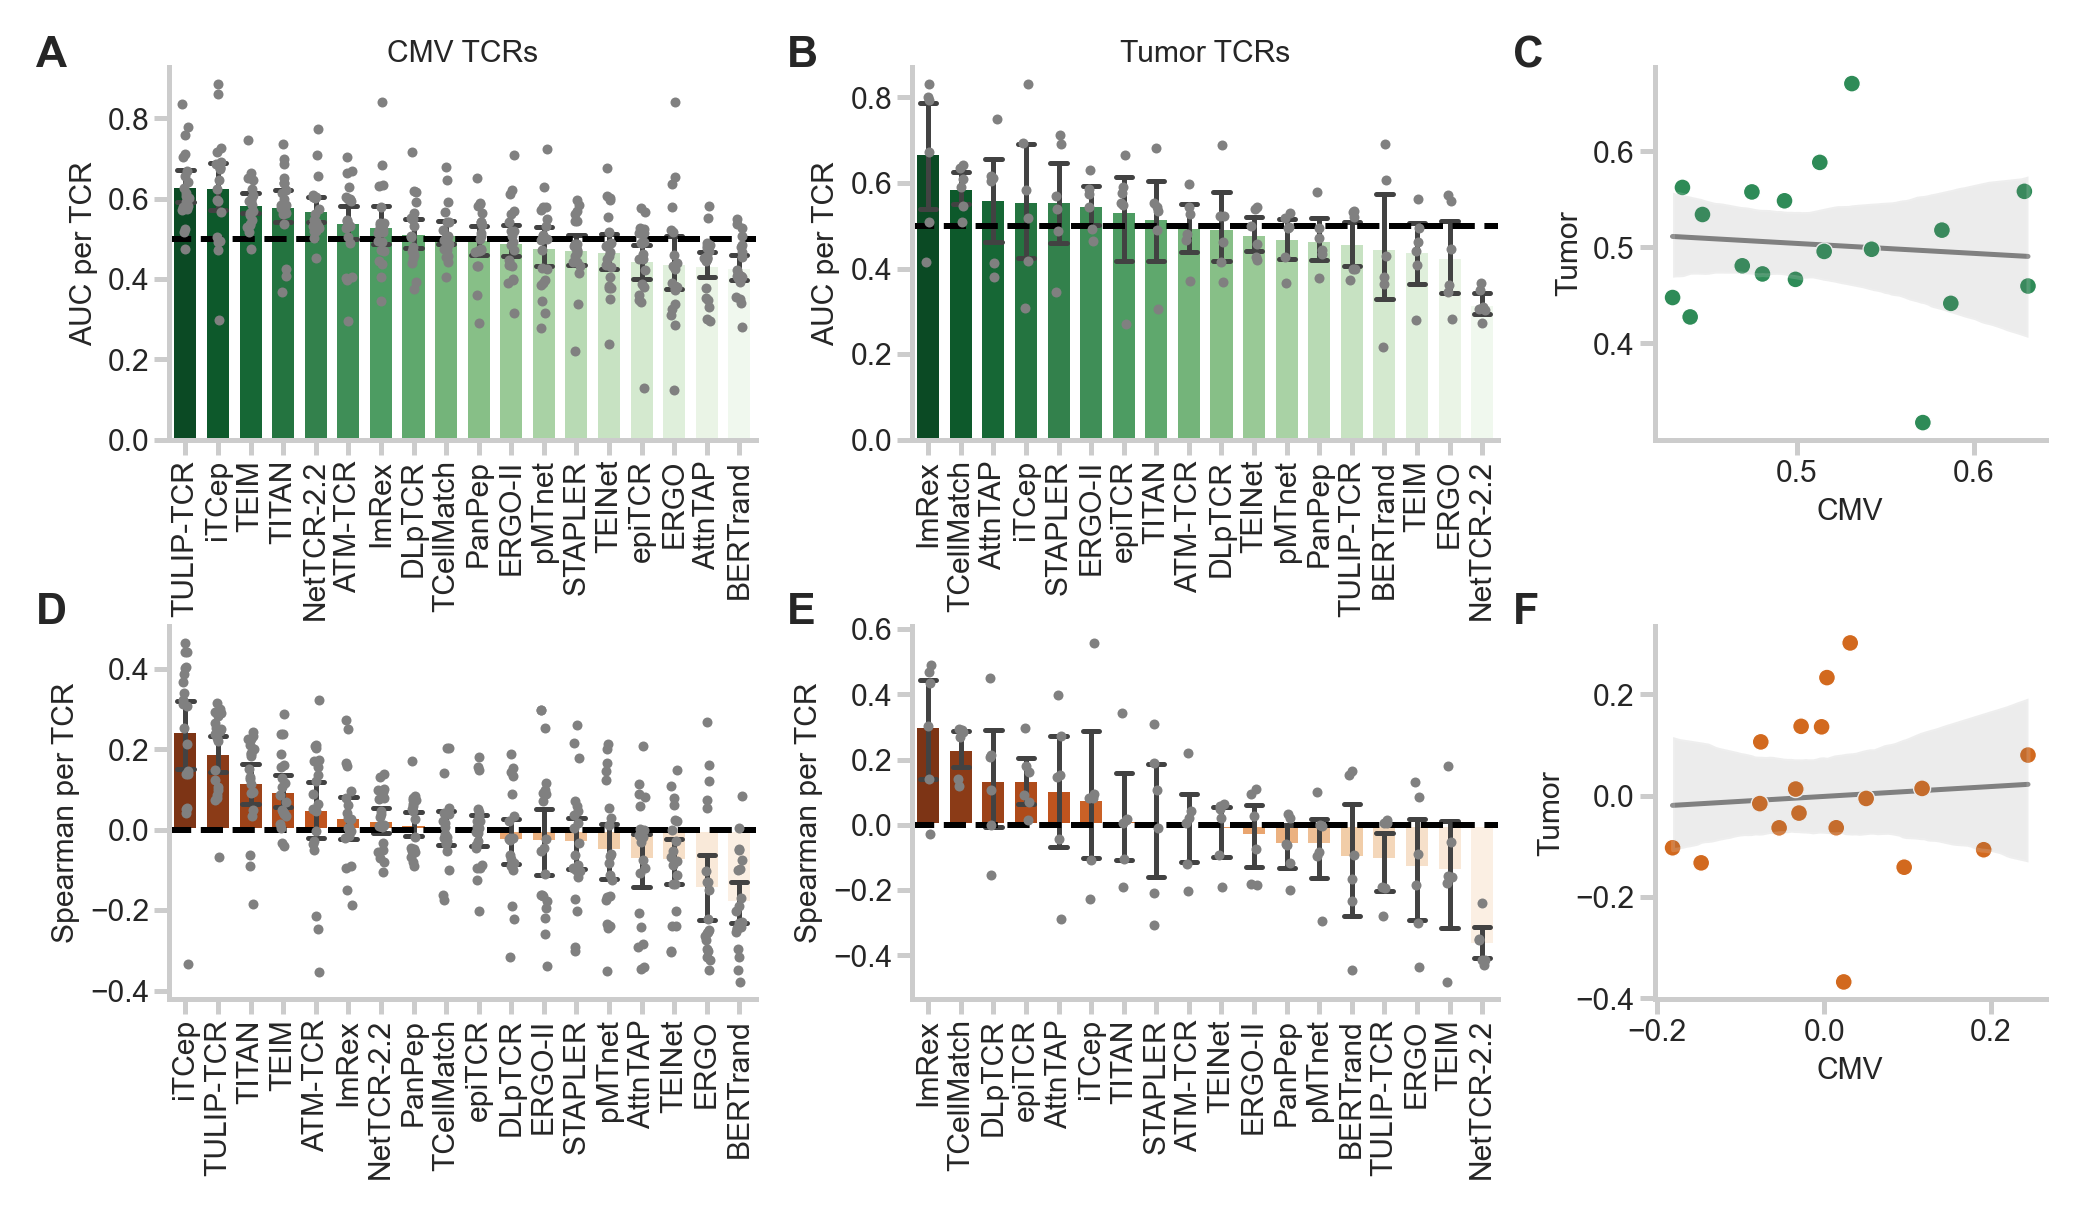

In [33]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.5),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[1, 1],
    width_ratios=[3, 3, 2],
    hspace=0.5,
    wspace=0.3
)

ax_a = fig.add_subplot(gridspecs["full"][0])
ax_b = fig.add_subplot(gridspecs["full"][1])
ax_c = fig.add_subplot(gridspecs["full"][2])
ax_d = fig.add_subplot(gridspecs["full"][3])
ax_e = fig.add_subplot(gridspecs["full"][4])
ax_f = fig.add_subplot(gridspecs["full"][5])

utils_plot.plot_barplot(df_perf_cmv, 'AUC', n_top=18, cmap='Greens_r', ax=ax_a, rdm=0.5)
ax_a.set_ylabel('AUC per TCR')

utils_plot.plot_barplot(df_perf_tumor, 'AUC', n_top=18, cmap='Greens_r', ax=ax_b, rdm=0.5)
ax_b.set_ylabel('AUC per TCR')

plot_corr_subsets('AUC', ax_c)

utils_plot.plot_barplot(df_perf_cmv, 'Spearman', n_top=18, cmap='Oranges_r', ax=ax_d, rdm=0.)
ax_d.set_ylabel('Spearman per TCR')

utils_plot.plot_barplot(df_perf_tumor, 'Spearman', n_top=18, cmap='Oranges_r', ax=ax_e, rdm=0.)
ax_e.set_ylabel('Spearman per TCR')

plot_corr_subsets('Spearman', ax_f)

ax_a.set_title('CMV TCRs', pad=1)
ax_b.set_title('Tumor TCRs', pad=1)

fig.text(0.07, 0.88, 'A', size='x-large', weight='bold')
fig.text(0.38, 0.88, 'B', size='x-large', weight='bold')
fig.text(0.68, 0.88, 'C', size='x-large', weight='bold')
fig.text(0.07, 0.42, 'D', size='x-large', weight='bold')
fig.text(0.38, 0.42, 'E', size='x-large', weight='bold')
fig.text(0.68, 0.42, 'F', size='x-large', weight='bold')

fig.tight_layout()
fig.savefig('../figures/sfig_mutation_separated.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/sfig_mutation_separated.png',
           dpi=DPI, bbox_inches='tight')

## Distributions

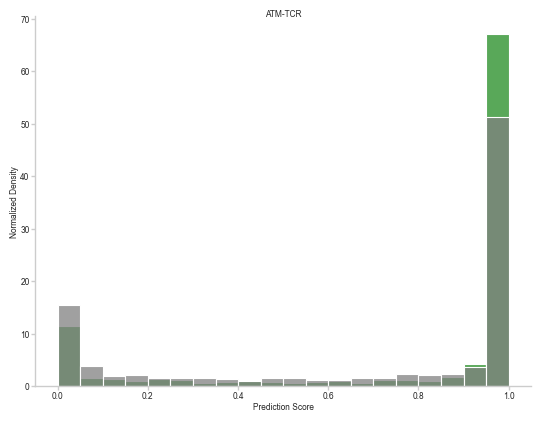

In [34]:
def plot_distribution(name, ax=None):
    n_bins = 20
    plot = sb.histplot(prediction_scores[prediction_scores['Label']==1], x=name, stat='percent',
                      bins=n_bins,
                       fill=True, color='forestgreen', label='Binding',
                      common_norm=True, ax=ax)
    plot = sb.histplot(prediction_scores[prediction_scores['Label']==0], x=name, stat='percent',
                       bins=n_bins,
                      fill=True, color='gray', label='Non-binding',
                      common_norm=True, ax=plot)
    
    plot.set_ylabel('Normalized Density', labelpad=1)
    plot.set_xlabel('Prediction Score', labelpad=1)
    plot.set_title(utils_config.mapper_methods[name.split('_')[0]], pad=0)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    
    sb.despine(ax=plot)
    plot.grid(False)
    
plot_distribution('atm-tcr')

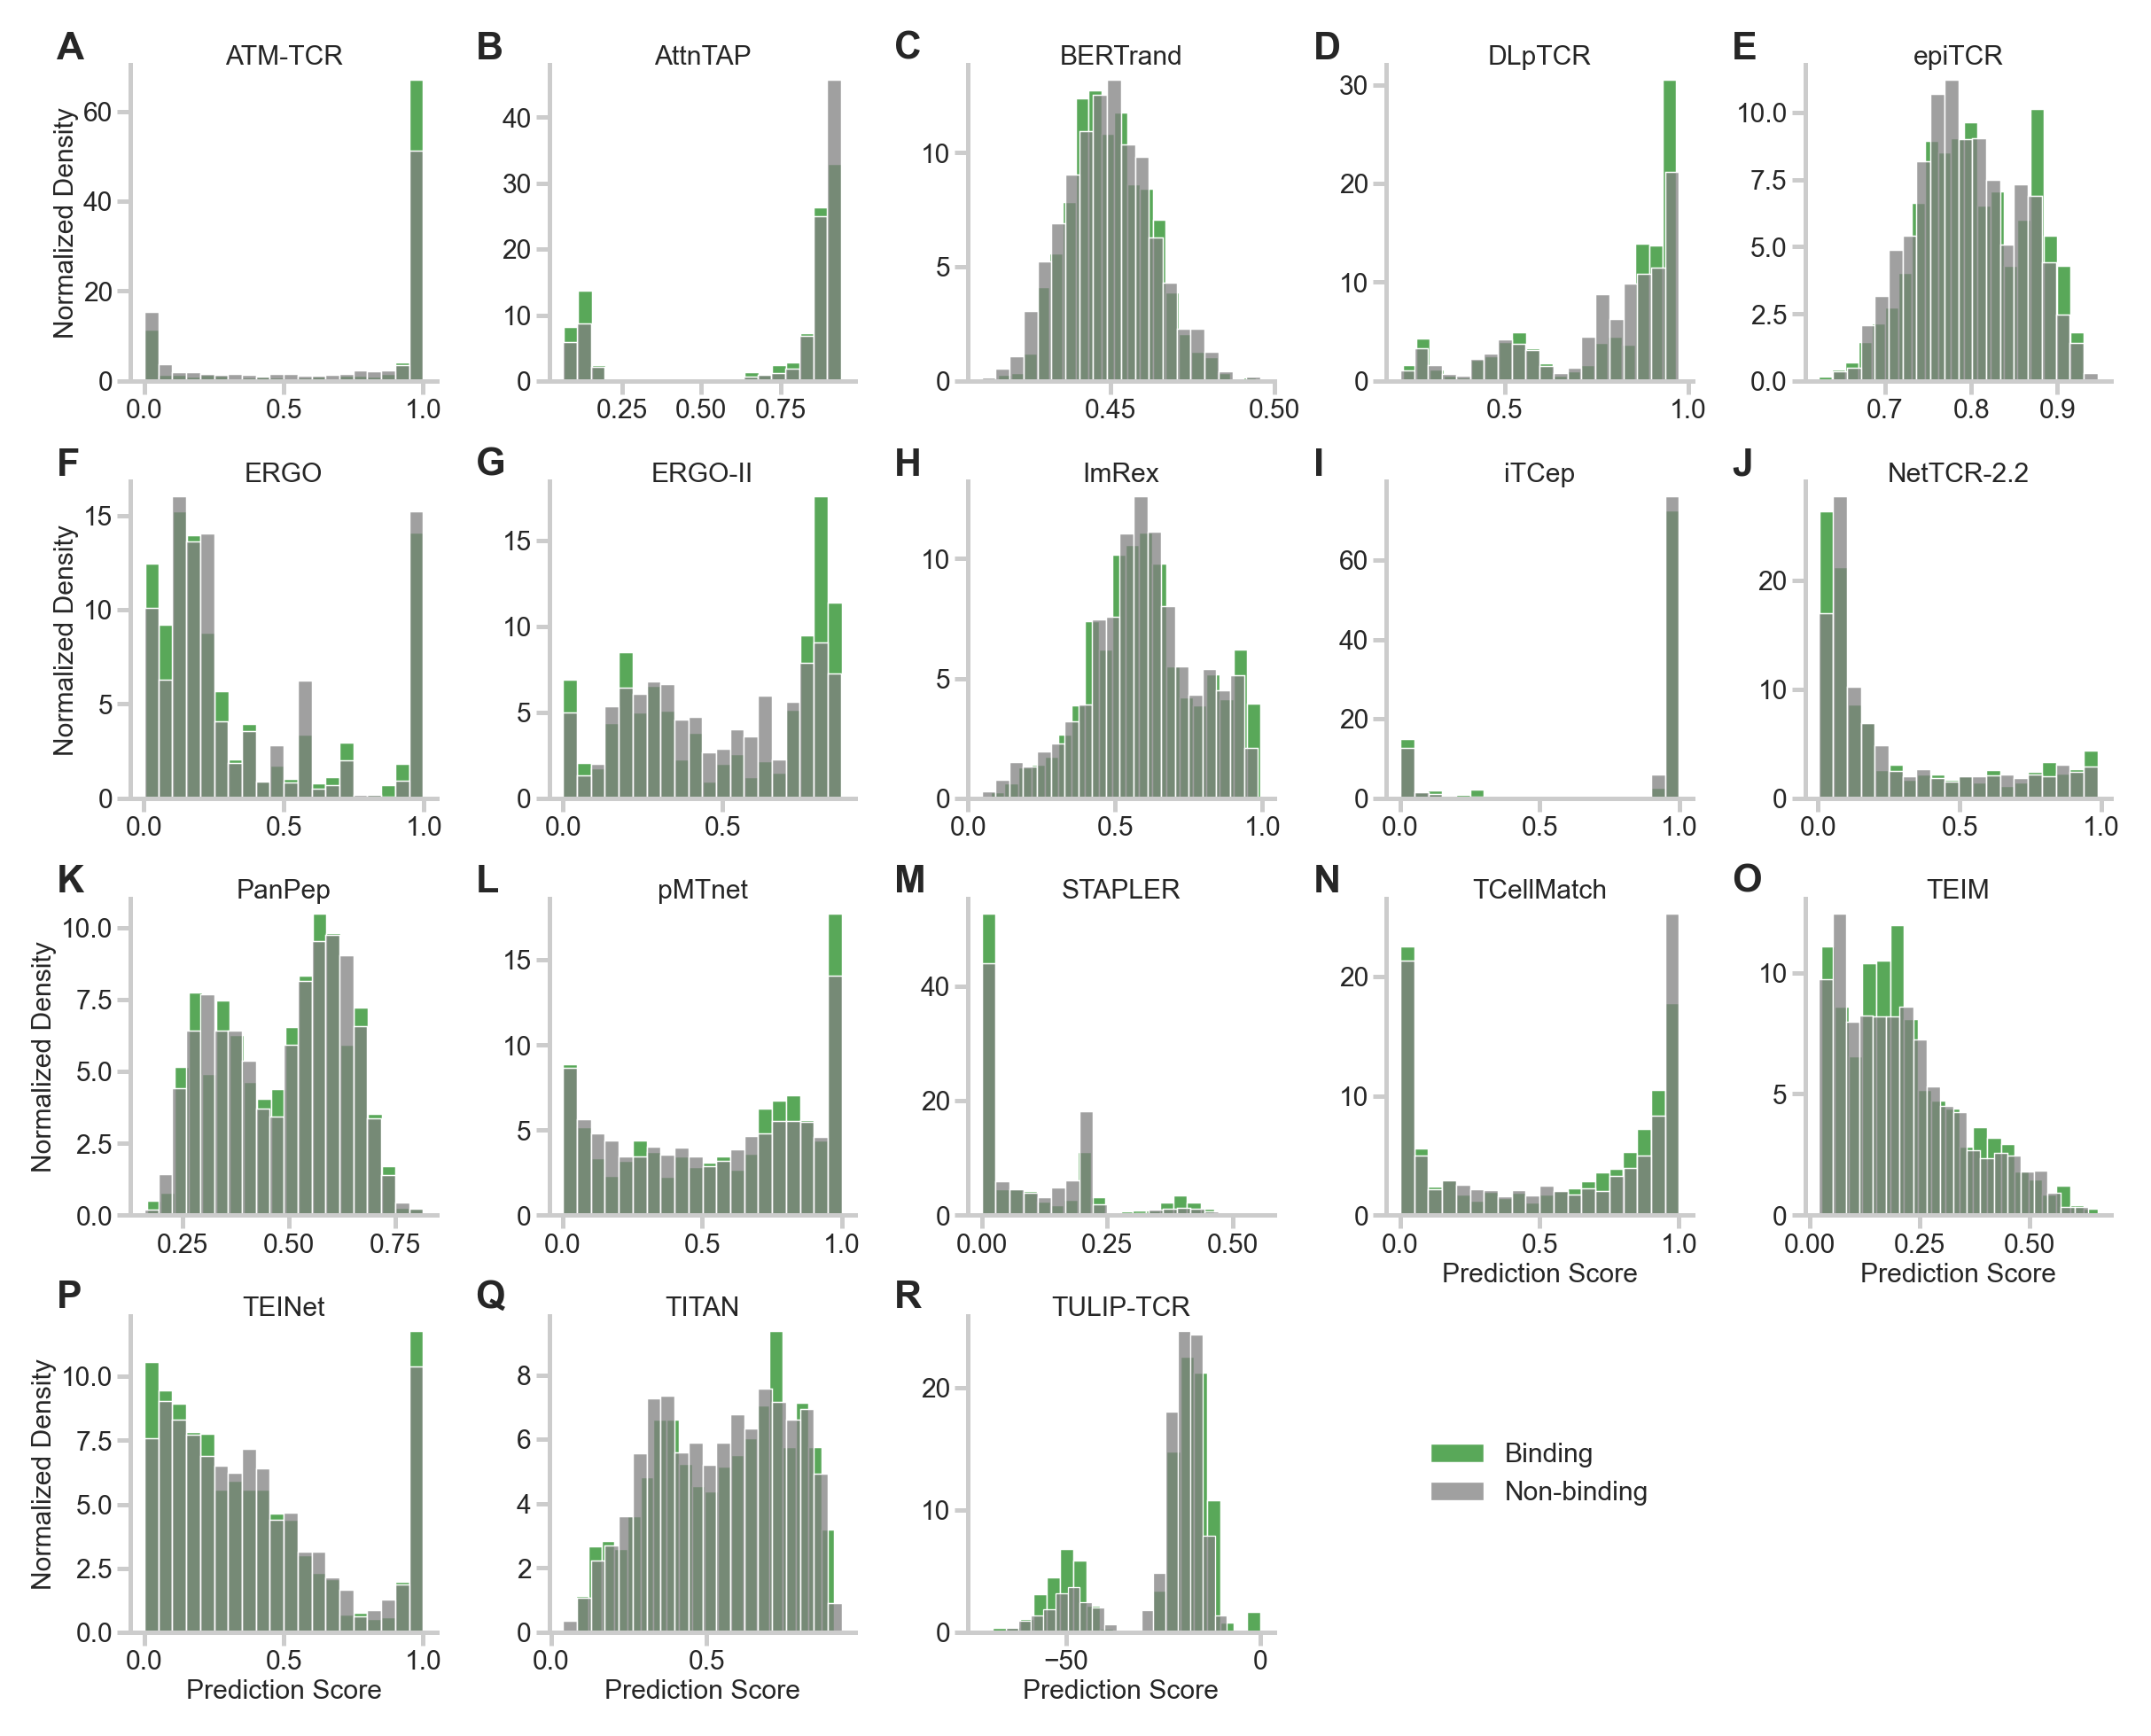

In [35]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.8),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=4,
    ncols=5,
    height_ratios=[1, 1, 1, 1],
    width_ratios=[1, 1, 1, 1, 1],
)


letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i, tag in enumerate(model_names_score):
    ax_tmp = fig.add_subplot(gridspecs["full"][i])
    plot_distribution(tag, ax_tmp)
    
    if i%5 != 0:
        ax_tmp.set_ylabel(None)
    if i < 13:
        ax_tmp.set_xlabel(None)
    
    fig.text(1/5.125*(i%5)+0.025, 0.975-i//5*0.2425, letters[i], size='x-large', weight='bold')
    

handles, labels = ax_tmp.get_legend_handles_labels()
ax_tmp = fig.add_subplot(gridspecs["full"][i+1])
ax_tmp.axis('off')
ax_tmp.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 0.5), frameon=False)

fig.tight_layout()
fig.savefig('../figures/sfig_mutation_benchmark_distributions.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/sfig_mutation_benchmark_distributions.png',
           dpi=DPI, bbox_inches='tight')

## Average over TCR

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\453913838.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


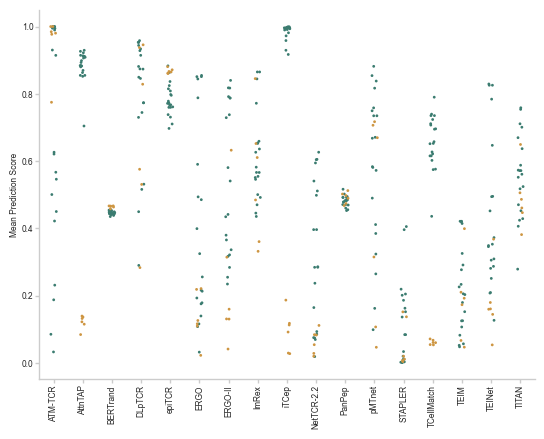

In [36]:
def plot_stats_prediction(stat, exclude=None, ax=None):
    df_tmp = prediction_scores[['TCR'] + prediction_scores.columns.tolist()[-18:]]
    df_tmp = pd.melt(df_tmp, id_vars=['TCR'], var_name='Method', value_name='Value')
    
    if stat.lower() == 'std':
        df_tmp = df_tmp.groupby(['Method', 'TCR']).std()
    else:
        df_tmp = df_tmp.groupby(['Method', 'TCR']).mean()
    df_tmp = df_tmp.reset_index()
    df_tmp['Dataset'] = df_tmp['TCR'].apply(lambda x: 'Tumor' if x.startswith('R') else 'CMV')
    
    if exclude is not None:
        df_tmp = df_tmp[~df_tmp['Method'].isin(exclude)]
    df_tmp['Method'] = df_tmp['Method'].str.split('_').str[0]
    df_tmp['Method'] = df_tmp['Method'].map(utils_config.mapper_methods)
    
    
    plot = sb.stripplot(data=df_tmp, x='Method', y='Value',
                          hue='Dataset', palette=color_dataset,
                         size=2, ax=ax)
    
    sb.despine(ax=plot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.grid(False)
    plot.set_ylabel(f'{stat} Prediction Score', labelpad=2)
    plot.set_xlabel(None)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()

plot_stats_prediction('Mean', ['tulip-tcr'])

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\2660675886.py:11: UserWarning: 
The palette list has fewer values (2) than needed (26) and will cycle, which may produce an uninterpretable plot.
  plot = sb.stripplot(data=df_tmp, x='Method', y='Label',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\2660675886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


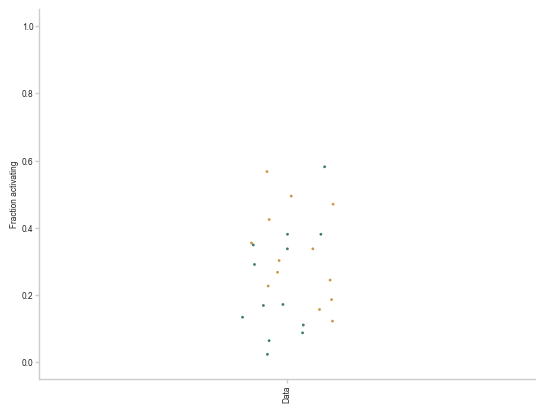

In [37]:
def plot_stats_data(stat, ax=None):
    df_tmp = prediction_scores[['TCR', 'Label']]
    df_tmp = df_tmp.groupby('TCR')['Label']
    if stat.lower() == 'std':
        df_tmp = df_tmp.std()
    else:
        df_tmp = df_tmp.mean()
    df_tmp = df_tmp.reset_index()
    df_tmp['Method'] = 'Data'

    plot = sb.stripplot(data=df_tmp, x='Method', y='Label',
                          hue='TCR', palette=color_dataset,
                         size=2, ax=ax)
    
    sb.despine(ax=plot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plot.grid(False)
    if stat.lower() == 'mean':
        plot.set_ylabel(f'Fraction activating', labelpad=2)
    else:
        plot.set_ylabel(f'Std', labelpad=2)
    plot.set_xlabel(None)
    plot.tick_params(axis='both', pad=1, color=plot.spines["bottom"].get_edgecolor(),
                     length=3, width=1, left=True, bottom=True)
    plot.legend().remove()
    plot.set_ylim(-0.05, 1.05)

plot_stats_data('Mean')

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\2660675886.py:11: UserWarning: 
The palette list has fewer values (2) than needed (26) and will cycle, which may produce an uninterpretable plot.
  plot = sb.stripplot(data=df_tmp, x='Method', y='Label',
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\2660675886.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\453913838.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\453913838.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\2660675886.py:11: UserWarning: 
The palette list has fewer 

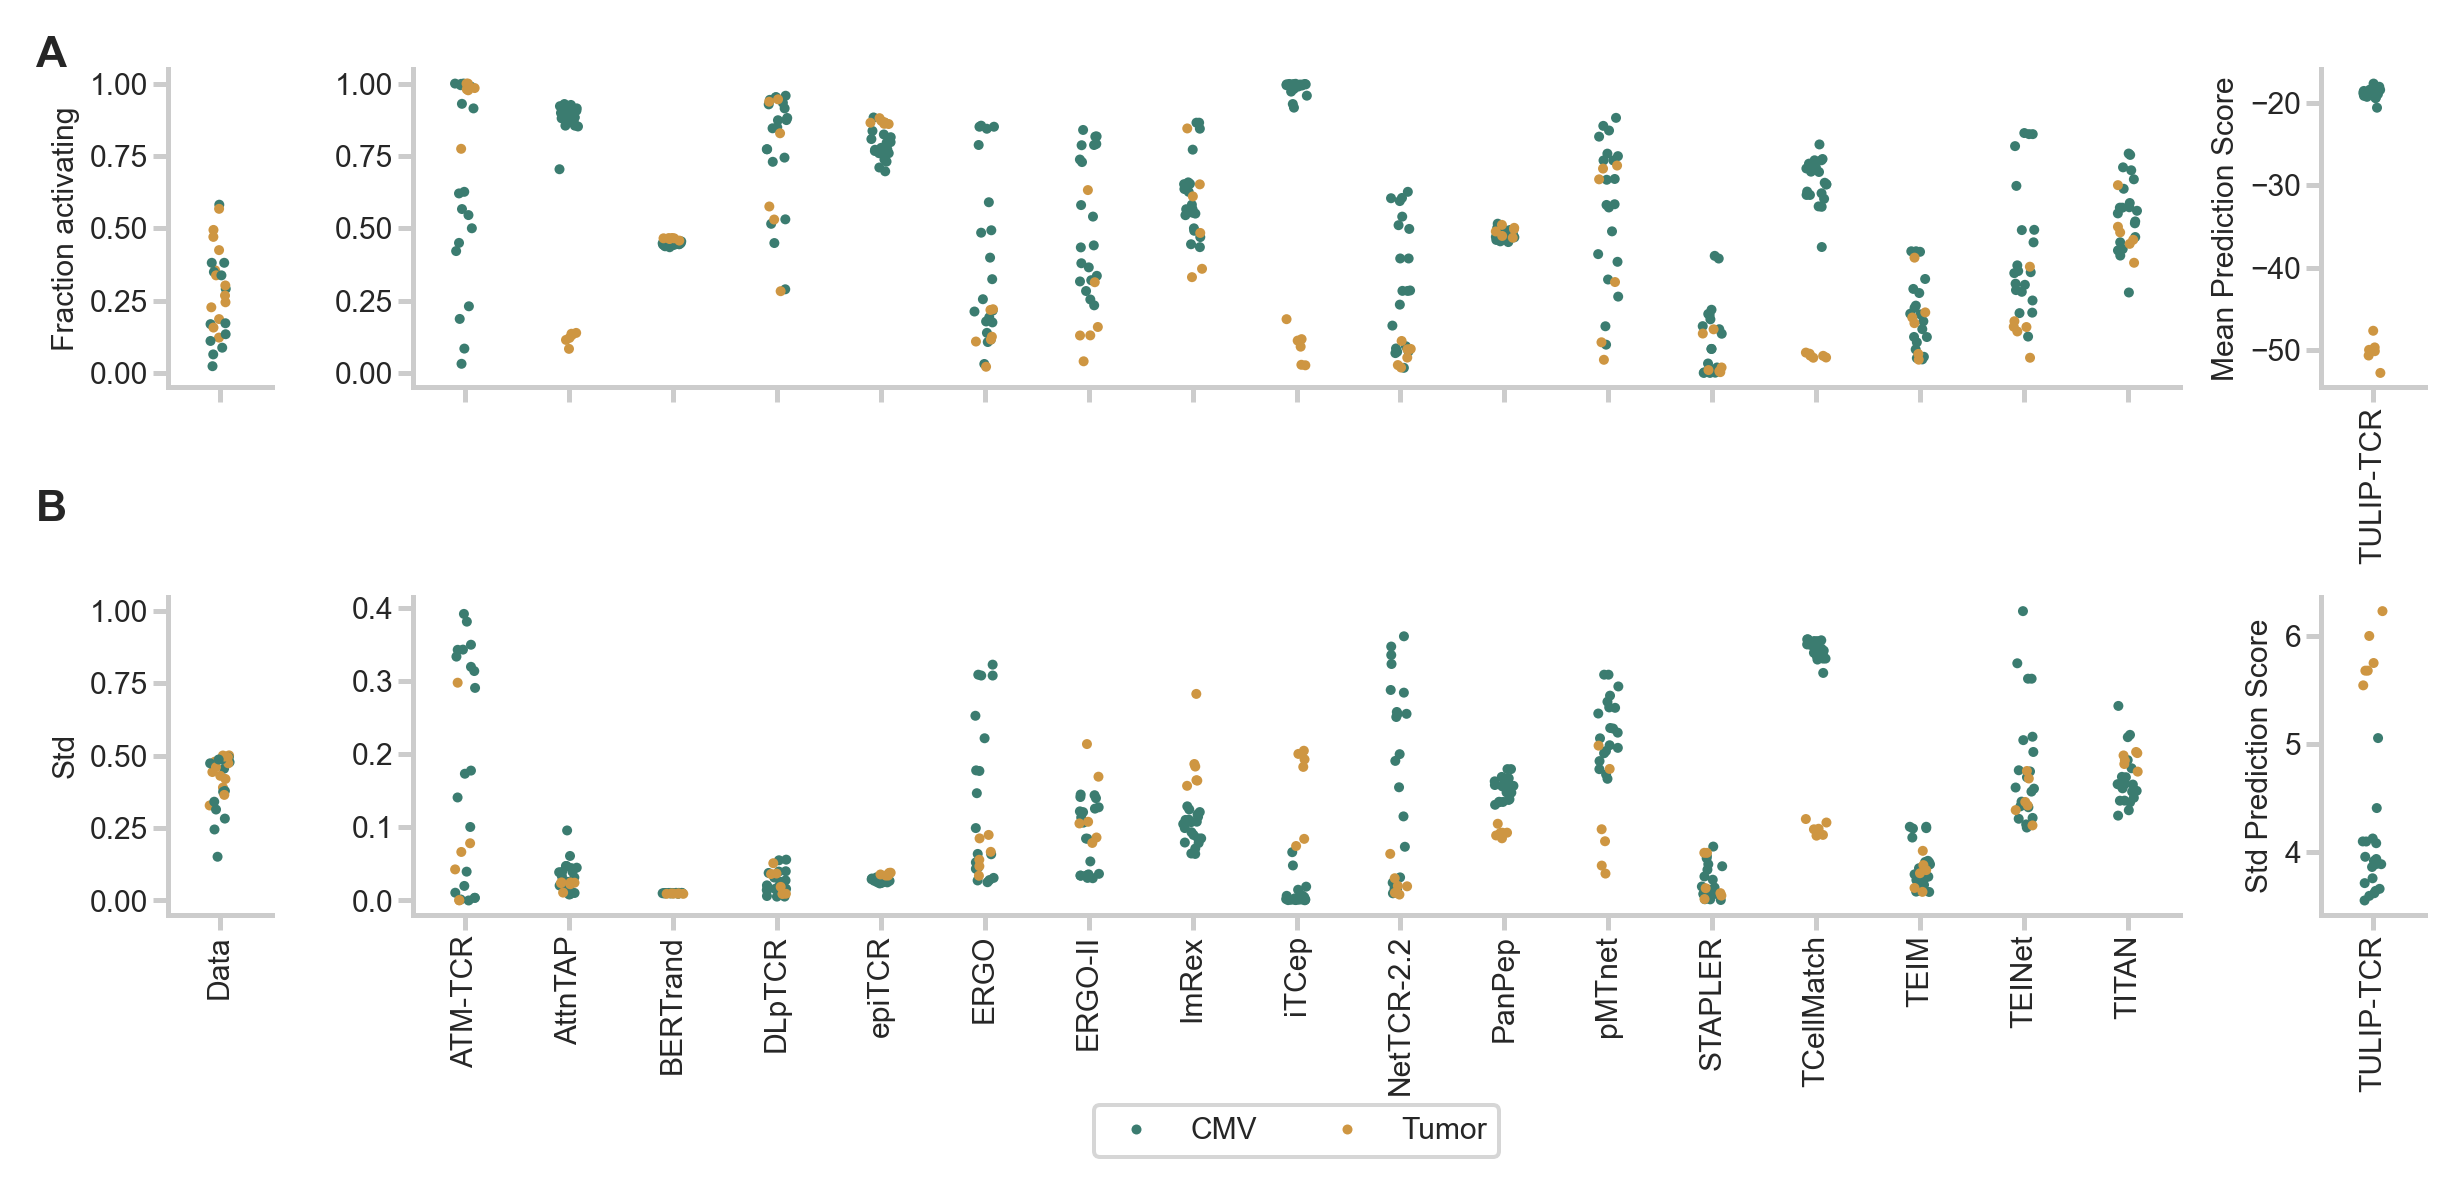

In [38]:
scale = 1
fig = plt.figure(figsize=(TEXT_WIDTH * scale, TEXT_WIDTH * scale * 0.5),
                 dpi=DPI)
set_font_size(6)
utils_plot.LINEWIDTH = 1

gridspecs = {}

gridspecs["full"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=3,
    height_ratios=[1, 1,],
    width_ratios=[1, 17, 1],
)

ax_a1 = fig.add_subplot(gridspecs["full"][0])
ax_a2 = fig.add_subplot(gridspecs["full"][1])
ax_a3 = fig.add_subplot(gridspecs["full"][2])
ax_b1 = fig.add_subplot(gridspecs["full"][3])
ax_b2 = fig.add_subplot(gridspecs["full"][4])
ax_b3 = fig.add_subplot(gridspecs["full"][5])

plot_stats_data('Mean', ax=ax_a1)
plot_stats_prediction('Mean', ['tulip-tcr'], ax_a2)
plot_stats_prediction('Mean', [el for el in best_models if el != 'tulip-tcr'], ax_a3)

plot_stats_data('Std', ax=ax_b1)
plot_stats_prediction('Std', ['tulip-tcr'], ax_b2)
plot_stats_prediction('Std', [el for el in best_models if el != 'tulip-tcr'], ax_b3)
    
ax_a1.set_xticklabels([])
ax_a2.set_xticklabels([])

ax_a2.set_ylabel(None)
ax_b2.set_ylabel(None)

ax_b2.legend(ncols=2, loc='upper center', bbox_to_anchor=(0.5, -0.55), frameon=True)
    
    
fig.text(0.0, 0.975, 'A', size='x-large', weight='bold')
fig.text(0.0, 0.6, 'B', size='x-large', weight='bold')


fig.tight_layout()
fig.savefig('../figures/sfig_mutation_predictionScores.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/sfig_mutation_predictionScores.png',
           dpi=DPI, bbox_inches='tight')

## Statistics

In [39]:
prediction_scores.groupby('TCR')['Epitope'].nunique()

TCR
CMV_10_4     172
CMV_11_4     172
CMV_1_4      172
CMV_2_4      172
CMV_3_4      172
CMV_4_4      172
CMV_51_10    172
CMV_52_10    172
CMV_54_10    172
CMV_5_2      172
CMV_65_8     172
CMV_66_8     172
CMV_6_2      172
CMV_73_14    172
CMV_74_14    172
CMV_77_14    172
CMV_81_14    172
CMV_82_14    172
CMV_83_3     172
CMV_84_3     172
R21          134
R23          134
R24          134
R25          134
R26          134
R28          134
Name: Epitope, dtype: int64

# Tables

In [40]:
from utils_latex import to_print_df, to_latex_string

In [41]:
metrics = ['AUC', 'APS', 'F1-Score', 'Pearson', 'Spearman']
df_print = to_print_df(df_performance_best, metrics, n_top=3, grouping='TCR')
df_print

Full Data                                               \
                      AUC            APS       F1-Score        Pearson   
ATM-TCR              0.50           0.31  \textbf{0.48}  \textbf{0.07}   
AttnTAP              0.47           0.29           0.47          -0.04   
BERTrand             0.45           0.27           0.47          -0.08   
DLpTCR               0.54           0.35           0.47           0.06   
epiTCR               0.53           0.32           0.47           0.04   
ERGO                 0.53           0.32  \textbf{0.48}           0.03   
ERGO-II     \textbf{0.54}  \textbf{0.37}  \textbf{0.48}           0.03   
ImRex                0.53  \textbf{0.36}           0.48           0.07   
iTCep       \textbf{0.56}  \textbf{0.38}           0.47  \textbf{0.09}   
NetTCR-2.2           0.43           0.28           0.47          -0.13   
PanPep               0.48           0.30           0.47          -0.03   
pMTnet      \textbf{0.54}           0.34           0.47  \textbf{0.09}   
STAPLER              0.47           0.32           0.47          -0.02   
TCellMatch           0.54           0.32           0.47           0.07   
TEIM                 0.48           0.29           0.47          -0.03   
TEINet               0.52           0.33           0.47           0.04   
TITAN                0.52           0.32           0.47           0.01   
TULIP-TCR            0.53           0.34           0.48           0.05   

                                      Per TCR                      \
                 Spearman                 AUC                 APS   
ATM-TCR             -0.05           0.53±0.10  \textbf{0.34±0.17}   
AttnTAP             -0.03           0.46±0.11           0.29±0.17   
BERTrand            -0.09           0.43±0.10           0.26±0.16   
DLpTCR      \textbf{0.10}           0.51±0.09           0.29±0.16   
epiTCR      \textbf{0.10}           0.47±0.11           0.29±0.17   
ERGO                 0.02           0.44±0.15           0.29±0.14   
ERGO-II             -0.01           0.51±0.09           0.32±0.19   
ImRex                0.05           0.56±0.14           0.34±0.20   
iTCep       \textbf{0.11}  \textbf{0.61±0.15}  \textbf{0.39±0.19}   
NetTCR-2.2          -0.16           0.51±0.13           0.31±0.14   
PanPep              -0.04           0.49±0.08           0.31±0.18   
pMTnet               0.09           0.48±0.10           0.30±0.16   
STAPLER             -0.10           0.49±0.10           0.30±0.18   
TCellMatch           0.09           0.53±0.07           0.29±0.16   
TEIM                -0.02           0.55±0.09           0.33±0.18   
TEINet               0.03           0.47±0.09           0.29±0.14   
TITAN               -0.00  \textbf{0.57±0.10}           0.33±0.16   
TULIP-TCR            0.01  \textbf{0.59±0.11}  \textbf{0.40±0.14}   

                                                                        
                      F1-Score             Pearson            Spearman  
ATM-TCR              0.37±0.22           0.06±0.16           0.04±0.16  
AttnTAP              0.42±0.19          -0.05±0.18          -0.03±0.19  
BERTrand             0.42±0.19          -0.12±0.16          -0.16±0.15  
DLpTCR               0.31±0.27           0.03±0.15           0.01±0.16  
epiTCR               0.41±0.19          -0.02±0.13           0.03±0.11  
ERGO                 0.40±0.21          -0.17±0.21          -0.14±0.19  
ERGO-II              0.28±0.29          -0.01±0.20          -0.03±0.17  
ImRex       \textbf{0.42±0.19}  \textbf{0.09±0.18}           0.09±0.18  
iTCep       \textbf{0.42±0.19}  \textbf{0.09±0.19}  \textbf{0.21±0.22}  
NetTCR-2.2           0.42±0.19          -0.04±0.19          -0.07±0.18  
PanPep               0.41±0.19          -0.01±0.09          -0.00±0.08  
pMTnet               0.41±0.19          -0.03±0.13          -0.06±0.16  
STAPLER              0.42±0.19          -0.00±0.11          -0.02±0.17  
TCellMatch           0.42±0.17           0.07±0.08         

In [42]:
to_latex_string(df_print)

\begin{table}[ht]
\resizebox{\textwidth}{!}{%}
\centering
\begin{tabular}{l l l l l l | l l l l l}
\toprule
 & Full Data &   &   &   &   & Per TCR &   &   &   &   \\
  & AUC & APS & F1-Score & Pearson & Spearman & AUC & APS & F1-Score & Pearson & Spearman \\
\midrule
ATM-TCR & 0.50 & 0.31 & \textbf{0.48} & \textbf{0.07} & -0.05 & 0.53±0.10 & \textbf{0.34±0.17} & 0.37±0.22 & 0.06±0.16 & 0.04±0.16 \\
AttnTAP & 0.47 & 0.29 & 0.47 & -0.04 & -0.03 & 0.46±0.11 & 0.29±0.17 & 0.42±0.19 & -0.05±0.18 & -0.03±0.19 \\
BERTrand & 0.45 & 0.27 & 0.47 & -0.08 & -0.09 & 0.43±0.10 & 0.26±0.16 & 0.42±0.19 & -0.12±0.16 & -0.16±0.15 \\
DLpTCR & 0.54 & 0.35 & 0.47 & 0.06 & \textbf{0.10} & 0.51±0.09 & 0.29±0.16 & 0.31±0.27 & 0.03±0.15 & 0.01±0.16 \\
epiTCR & 0.53 & 0.32 & 0.47 & 0.04 & \textbf{0.10} & 0.47±0.11 & 0.29±0.17 & 0.41±0.19 & -0.02±0.13 & 0.03±0.11 \\
ERGO & 0.53 & 0.32 & \textbf{0.48} & 0.03 & 0.02 & 0.44±0.15 & 0.29±0.14 & 0.40±0.21 & -0.17±0.21 & -0.14±0.19 \\
ERGO-II & \textbf{0.54} & \textbf{

## Numbers

In [43]:
df_performance_alt[(df_performance_alt['Metric'].isin(['AUC', 'Spearman']))
                  & (~df_performance_alt['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
                  & (df_performance_alt['BaseModel']=='tcellmatch')].groupby(['Variant', 'Metric'])['Value'].mean()

Variant     Metric  
GRU 0       AUC         0.510672
            Spearman    0.033865
GRU 1       AUC         0.595374
            Spearman    0.125206
GRU 2       AUC         0.562058
            Spearman    0.135054
GRU-sep 0   AUC         0.465601
            Spearman   -0.145225
GRU-sep 1   AUC         0.506797
            Spearman    0.048134
GRU-sep 2   AUC         0.544943
            Spearman    0.096266
LSTM 0      AUC         0.547026
            Spearman    0.099209
LSTM 1      AUC         0.553604
            Spearman    0.071195
LSTM 2      AUC         0.584651
            Spearman    0.155073
LSTM-sep 0  AUC         0.453361
            Spearman   -0.133038
LSTM-sep 1  AUC         0.620277
            Spearman    0.285097
LSTM-sep 2  AUC         0.502749
            Spearman   -0.004602
Linear 0    AUC         0.532603
            Spearman    0.140218
Linear 1    AUC         0.530374
            Spearman    0.056457
Linear 2    AUC         0.554439
            Spearman  

In [44]:
df_performance_alt[(df_performance_alt['Metric'].isin(['AUC', 'Spearman']))
                  & (~df_performance_alt['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
                  & (df_performance_alt['BaseModel']=='tcellmatch')].groupby(['Variant', 'Metric'])['Value'].std()

Variant     Metric  
GRU 0       AUC         0.062381
            Spearman    0.095602
GRU 1       AUC         0.111084
            Spearman    0.172700
GRU 2       AUC         0.095434
            Spearman    0.129098
GRU-sep 0   AUC         0.068807
            Spearman    0.101365
GRU-sep 1   AUC         0.062595
            Spearman    0.120246
GRU-sep 2   AUC         0.078176
            Spearman    0.105973
LSTM 0      AUC         0.117849
            Spearman    0.232632
LSTM 1      AUC         0.100999
            Spearman    0.168391
LSTM 2      AUC         0.129742
            Spearman    0.177461
LSTM-sep 0  AUC         0.091971
            Spearman    0.130246
LSTM-sep 1  AUC         0.106037
            Spearman    0.155038
LSTM-sep 2  AUC         0.104120
            Spearman    0.155892
Linear 0    AUC         0.079830
            Spearman    0.111051
Linear 1    AUC         0.071192
            Spearman    0.135547
Linear 2    AUC         0.100326
            Spearman  

In [45]:
prediction_scores[['MHC'] + prediction_scores.columns[-18:].tolist()].groupby('MHC').mean()

,atm-tcr,attntap_VDJDB,bertrand,dlptcr_BETA,epitcr_WITH_MHC,ergo-i_AE_VDJDB,ergo-ii_VDJDB,imrex_FULL,itcep,nettcr_t.1.v.0,panpep,pmtnet,stapler,tcellmatch_LINEAR_CV1,teim,teinet_SMALL_DS,titan,tulip-tcr
MHC,,,,,,,,,,,,,,,,,,
HLA-A*02:01,0.654444,0.88258,0.446075,0.785693,0.781860,0.405351,0.539812,0.614034,0.984821,0.322103,0.481637,0.578806,0.116068,0.658024,0.218120,0.437368,0.557354,-18.821314
HLA-B*07:02,0.952695,0.12136,0.464326,0.683459,0.867413,0.135502,0.234636,0.547324,0.094111,0.063230,0.490402,0.426766,0.054897,0.061103,0.181165,0.177403,0.488240,-50.147524


In [46]:
prediction_scores.groupby('MHC')['Label'].mean()

MHC
HLA-A*02:01    0.255233
HLA-B*07:02    0.354478
Name: Label, dtype: float64

In [47]:
0.354478/0.255233

1.3888407846947692

In [48]:
iedb = pd.read_csv('../data/processed/iedb.csv', index_col=0)
vdjdb = pd.read_csv('../data/processed/vdjdb.csv', index_col=0)
mcpas = pd.read_csv('../data/processed/mcpas_tcr.csv', index_col=0)
df_all_dbs = pd.concat([iedb, vdjdb, mcpas])[['CDR3_beta', 'Epitope']].drop_duplicates()
df_all_dbs = df_all_dbs[df_all_dbs['CDR3_beta'].notna()]
df_all_dbs = df_all_dbs[df_all_dbs['Epitope'].isin(['NLVPMVATV', 'VPSVWRSSL'])]
df_all_dbs = pd.DataFrame(df_all_dbs.groupby('Epitope')['CDR3_beta'].nunique())
df_all_dbs

C:\Users\felix.drost\AppData\Local\Temp\ipykernel_20976\2779016989.py:1: DtypeWarning: Columns (1,2,3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  iedb = pd.read_csv('../data/processed/iedb.csv', index_col=0)


,CDR3_beta
Epitope,
NLVPMVATV,6916


In [49]:
prediction_scores[prediction_scores['TCR']=='CMV_81_14']['itcep'].min()

0.9664

In [50]:
prediction_scores[prediction_scores['TCR']=='CMV_81_14']['itcep'].std()

0.005225922035192549

In [51]:
df_performance_best[
    (df_performance_best['BaseModel'].isin(['itcep', 'tulip-tcr', 'titan', 'imrex', 'teim']))
    & (df_performance_best['Metric']=='AUC')
    & (~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
].groupby('Dataset')['Value'].mean()

Dataset
Cmv      0.591923
Tumor    0.529676
Name: Value, dtype: float64

In [52]:
0.591923 - 0.529676

0.06224699999999994

In [53]:
df_performance_best[
    (df_performance_best['BaseModel'].isin(['itcep', 'tulip-tcr', 'titan', 'imrex', 'tcellmatch']))
    & (df_performance_best['Metric']=='Spearman')
    & (~df_performance_best['Group'].isin(['full_data', 'Average', 'WeightedAverage']))
].groupby('Dataset')['Value'].mean()

Dataset
Cmv      0.117648
Tumor    0.104616
Name: Value, dtype: float64

## Stats: metrics by dataset

In [54]:
df_perf_tumor[~df_perf_tumor['Group'].isin(['full_data', 'Average'])
                & (df_perf_tumor['Metric']=='AUC')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(8)

BaseModel
imrex         0.670505
tcellmatch    0.588478
attntap       0.562401
itcep         0.558348
stapler       0.557754
ergo-ii       0.548523
epitcr        0.534252
titan         0.517978
Name: Value, dtype: float64

In [55]:
df_perf_cmv[~df_perf_cmv['Group'].isin(['full_data', 'Average'])
                & (df_perf_cmv['Metric']=='AUC')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(9)

BaseModel
tulip-tcr     0.630729
itcep         0.628690
teim          0.587064
titan         0.582031
nettcr        0.571245
atm-tcr       0.542235
imrex         0.531102
dlptcr        0.515413
tcellmatch    0.512943
Name: Value, dtype: float64

imrex, tcellmatch, itcep, titan

In [56]:
df_perf_tumor[~df_perf_tumor['Group'].isin(['full_data', 'Average'])
                & (df_perf_tumor['Metric']=='Spearman')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(8)

BaseModel
imrex         0.301599
tcellmatch    0.233188
dlptcr        0.136987
epitcr        0.136052
attntap       0.106333
itcep         0.080299
titan         0.014496
stapler       0.013241
Name: Value, dtype: float64

In [57]:
df_perf_cmv[~df_perf_cmv['Group'].isin(['full_data', 'Average'])
                & (df_perf_cmv['Metric']=='Spearman')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(9)

BaseModel
itcep         0.244543
tulip-tcr     0.191394
titan         0.117541
teim          0.096059
atm-tcr       0.050450
imrex         0.031322
nettcr        0.023577
panpep        0.014572
tcellmatch    0.003438
Name: Value, dtype: float64

imrex, tcellmatch, itcep, titan, 

In [58]:
df_perf_cmv[~df_perf_cmv['Group'].isin(['full_data', 'Average'])
                & (df_perf_cmv['Metric']=='AUC')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(5).mean()

0.5999515991657558

In [59]:
df_perf_cmv[~df_perf_cmv['Group'].isin(['full_data', 'Average'])
                & (df_perf_cmv['Metric']=='Spearman')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(5).mean()

0.13999732232872267

In [60]:
df_perf_tumor[~df_perf_tumor['Group'].isin(['full_data', 'Average'])
                & (df_perf_tumor['Metric']=='AUC')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(5).mean()

0.5874972548284794

In [61]:
df_perf_tumor[~df_perf_tumor['Group'].isin(['full_data', 'Average'])
                & (df_perf_tumor['Metric']=='Spearman')
        ].groupby('BaseModel')['Value'].mean().sort_values(ascending=False).head(5).mean()

0.18283158363460061

# Table: metrics by dataset

In [62]:
df_print_tumor = to_print_df(df_perf_tumor, metrics, n_top=3, grouping='TCR')
df_print_tumor = df_print_tumor[['Per TCR']]
df_print_tumor.columns = pd.MultiIndex.from_arrays([['Per Tumor TCR']*5, df_print_tumor.columns.get_level_values(1)])

df_print_cmv = to_print_df(df_perf_cmv, metrics, n_top=3, grouping='TCR')
df_print_cmv = df_print_cmv[['Per TCR']]
df_print_cmv.columns = pd.MultiIndex.from_arrays([['Per CMV TCR']*5, df_print_cmv.columns.get_level_values(1)])

df_print = pd.concat([df_print_cmv, df_print_tumor], axis=1)
df_print

Per CMV TCR                                          \
                           AUC                 APS            F1-Score   
ATM-TCR              0.54±0.10           0.33±0.16           0.33±0.22   
AttnTAP              0.44±0.08           0.25±0.13           0.39±0.19   
BERTrand             0.43±0.07           0.24±0.15           0.39±0.18   
DLpTCR               0.52±0.08           0.27±0.15           0.25±0.26   
epiTCR               0.45±0.10           0.26±0.15           0.39±0.19   
ERGO                 0.44±0.16           0.28±0.13           0.39±0.19   
ERGO-II              0.49±0.09           0.27±0.17           0.21±0.28   
ImRex                0.53±0.11           0.28±0.15  \textbf{0.39±0.19}   
iTCep       \textbf{0.63±0.14}  \textbf{0.37±0.18}  \textbf{0.39±0.19}   
NetTCR-2.2           0.57±0.07           0.32±0.15           0.39±0.19   
PanPep               0.50±0.08           0.29±0.17           0.39±0.19   
pMTnet               0.48±0.11           0.28±0.17           0.39±0.18   
STAPLER              0.47±0.09           0.26±0.15           0.39±0.19   
TCellMatch           0.51±0.07           0.25±0.14           0.39±0.17   
TEIM        \textbf{0.59±0.06}  \textbf{0.34±0.18}           0.34±0.22   
TEINet               0.47±0.10           0.26±0.13           0.39±0.19   
TITAN                0.58±0.09           0.31±0.15           0.39±0.19   
TULIP-TCR   \textbf{0.63±0.09}  \textbf{0.43±0.13}  \textbf{0.40±0.18}   

                                                         Per Tumor TCR  \
                       Pearson            Spearman                 AUC   
ATM-TCR              0.06±0.16           0.05±0.17           0.50±0.08   
AttnTAP             -0.10±0.13          -0.08±0.16  \textbf{0.56±0.14}   
BERTrand            -0.13±0.12          -0.18±0.12           0.45±0.17   
DLpTCR               0.01±0.12          -0.03±0.13           0.50±0.11   
epiTCR              -0.04±0.11          -0.00±0.10           0.53±0.14   
ERGO                -0.19±0.22          -0.15±0.18           0.43±0.12   
ERGO-II             -0.01±0.21          -0.03±0.19           0.55±0.06   
ImRex                0.03±0.11           0.03±0.12  \textbf{0.67±0.17}   
iTCep                0.10±0.20  \textbf{0.24±0.19}           0.56±0.19   
NetTCR-2.2           0.05±0.05           0.02±0.07           0.32±0.03   
PanPep               0.01±0.09           0.01±0.07           0.47±0.07   
pMTnet              -0.02±0.13          -0.05±0.17           0.47±0.06   
STAPLER             -0.02±0.08          -0.03±0.15           0.56±0.14   
TCellMatch           0.06±0.08           0.00±0.10  \textbf{0.59±0.05}   
TEIM        \textbf{0.12±0.09}           0.10±0.09           0.44±0.10   
TEINet              -0.09±0.16          -0.08±0.13           0.48±0.05   
TITAN       \textbf{0.12±0.12}  \textbf{0.12±0.12}           0.52±0.12   
TULIP-TCR   \textbf{0.24±0.10}  \textbf{0.19±0.10}           0.46±0.08   

                                                                        \
                           APS            F1-Score             Pearson   
ATM-TCR              0.37±0.19           0.51±0.19           0.07±0.17   
AttnTAP              0.43±0.23  \textbf{0.51±0.19}  \textbf{0.12±0.24}   
BERTrand             0.34±0.18           0.51±0.19          -0.10±0.27   
DLpTCR               0.36±0.20           0.51±0.19           0.09±0.22   
epiTCR               0.39±0.18           0.51±0.18           0.04±0.20   
ERGO                 0.32±0.18           0.46±0.29          -0.12±0.17   
ERGO-II     \textbf{0.46±0.21}           0.51±0.19           0.00±0.17   
ImRex       \textbf{0.53±0.23}  \textbf{0.52±0.20}  \textbf{0.30±0.23}   
iTCep       \textbf{0.45±0.24}           0.51±0.18           0.09±0.15   
NetTCR-2.2           0.28±0.13           0.51±0.18          -0.35±0.10   
PanPep               0.35±0.20           0.51±0.18          -0.04±0.08   
pMTnet               0.37±0.12           0.51±0.18          -0.06±0.15   
STAPLER              

In [63]:
to_latex_string(df_print)

\begin{table}[ht]
\resizebox{\textwidth}{!}{%}
\centering
\begin{tabular}{l l l l l l | l l l l l}
\toprule
 & Per CMV TCR &   &   &   &   & Per Tumor TCR &   &   &   &   \\
  & AUC & APS & F1-Score & Pearson & Spearman & AUC & APS & F1-Score & Pearson & Spearman \\
\midrule
ATM-TCR & 0.54±0.10 & 0.33±0.16 & 0.33±0.22 & 0.06±0.16 & 0.05±0.17 & 0.50±0.08 & 0.37±0.19 & 0.51±0.19 & 0.07±0.17 & -0.01±0.15 \\
AttnTAP & 0.44±0.08 & 0.25±0.13 & 0.39±0.19 & -0.10±0.13 & -0.08±0.16 & \textbf{0.56±0.14} & 0.43±0.23 & \textbf{0.51±0.19} & \textbf{0.12±0.24} & 0.11±0.24 \\
BERTrand & 0.43±0.07 & 0.24±0.15 & 0.39±0.18 & -0.13±0.12 & -0.18±0.12 & 0.45±0.17 & 0.34±0.18 & 0.51±0.19 & -0.10±0.27 & -0.10±0.23 \\
DLpTCR & 0.52±0.08 & 0.27±0.15 & 0.25±0.26 & 0.01±0.12 & -0.03±0.13 & 0.50±0.11 & 0.36±0.20 & 0.51±0.19 & 0.09±0.22 & \textbf{0.14±0.21} \\
epiTCR & 0.45±0.10 & 0.26±0.15 & 0.39±0.19 & -0.04±0.11 & -0.00±0.10 & 0.53±0.14 & 0.39±0.18 & 0.51±0.18 & 0.04±0.20 & 0.14±0.10 \\
ERGO & 0.44±0.16 & 0.28±